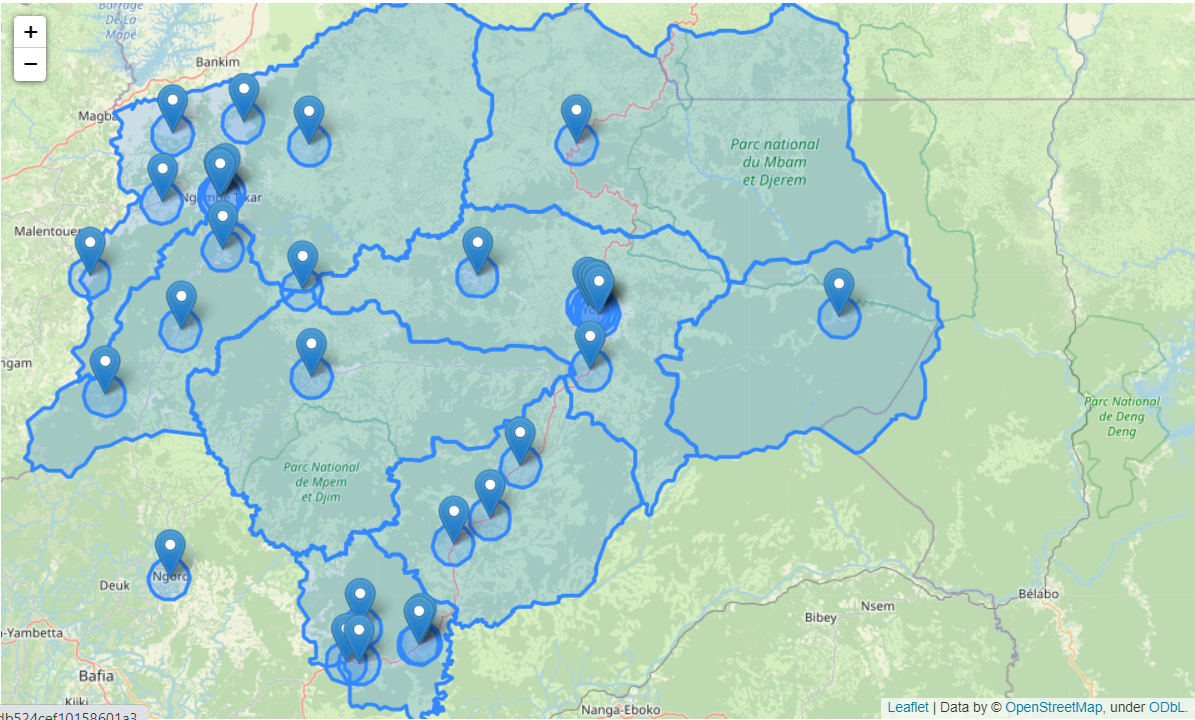

# Using data analysis and GIS tools for health district's microplanification

## Introduction
Selon l'UNICEF la microplanification est l’un des outils utilisés par les agents de santé pour s’assurer que les services de vaccination touchent chaque communauté. La microplanification est utilisée pour identifier les communautés prioritaires, pour surmonter les obstacles existants et pour dresser des plans de travail donnant lieu à des solutions.        
Elle est souvent utilisée lors de la vaccination de routine ou des campagnes, lors de la distribution des MILDA, lors des campagnes de traitement de masse (onchocercose, filariose lymphatique , trachome...).    
Avant d’élaborer les microplans, les responsables doivent disposer d’autant d’informations que possible sur les populations cibles. Les données démographiques, les rapports des programmes de santé et les cartes actualisées des aires de santé constituent des points de départ dans le processus de microplanification.      

Une carte opérationnelle doit comprendre:
- Une zone de desserte connue
- Les villages et les communautés couverts par les sites fixes, des sites pour services de proximité (stratégies avancées) ou lors de journées de santé de la mère et de l'enfant.
- Les points (POI) d'intêret importants (points d'eau, écoles, lieux de culte, domiciles de CHW, points de transits de nomades...)
- Les obstacles aux prestations de service (inondation, routes impraticables)
- Les distances et temps de trajet entre sites importants
- Les zones urbaines peuvent utiliserles plans des rues, les cartes satelittaires...)

Le présent travaille vise à montrer l'importance des systèmes d'information géographique, du mobile health (kobotoolbox) ainsi que les outils de data analyse (python et ses librairies) dans la microplanification.

## Datasets

Cinq (5) fichiers ont été utilisés pour ce travail de microplanification des activités de santé.
- Le shapefile des aires du district de santé de YOKO qui comporte les données des 8 aires de santé.
- Le fichier shapefile de l'aire de santé de NDJOLE
- Le fichier shapefile de toutes les formations sanitaires du district de santé de YOKO
- Le fichier excel des points d'intêrets d'une partie de l'aire de NDJOLE. Ces points ont été collectés à partir de l'outil kobocollect.
- Le fichier geojson avec les limites administratives des arrondissements du Cameroun.

La coordonnée projetées pour la zone étudiée est : WGS 84 / UTM zone 32N EPSG:32632

### Importations des librairies

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

### Acquisition, nettoyage et exploration de données.

- Acquerir les données
- Verifier leurs types
- Récupérer leur crs.
- Nettoyer les données
- Visualiser ces données

#### Shapefile des aires de santé

In [2]:
district = gpd.read_file('District Yoko/aires_DS_Yoko.shp')

In [3]:
type(district)

geopandas.geodataframe.GeoDataFrame

In [4]:
# Vérifier le crs du dataframe
district.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Ce geodataframe utilise la projection géographique WGS 84

In [5]:
district.head()

OBJECTID_1  Id   Nom_AS Nom_Dist Source1     Source2  Code_AS Source3  \
0        1678   0    Doume     Yoko    None  LevÃ©s GPS  01YOO01    None   
1        1674   0    Linte     Yoko    None  LevÃ©s GPS  01YOO02    None   
2        1675   0  Makouri     Yoko    None  LevÃ©s GPS  01YOO03    None   
3        1673   0   Mankim     Yoko    None  LevÃ©s GPS  01YOO04    None   
4        1676   0   Nditam     Yoko    None  LevÃ©s GPS  01YOO05    None   

   Region         Area  Population  \
0  Centre  4774.909483        1854   
1  Centre  3279.813398        2879   
2  Centre  2600.853094         527   
3  Centre  2312.149743        4010   
4  Centre  1670.244025        4077   

                                            geometry  
0  POLYGON ((12.10599 6.16252, 12.10667 6.16374, ...  
1  POLYGON ((11.69400 5.58459, 11.69405 5.58451, ...  
2  POLYGON ((13.07743 5.51308, 13.07770 5.51280, ...  
3  POLYGON ((12.23867 5.39422, 12.23934 5.39365, ...  
4  POLYGON ((11.49125 5.75376, 11.49206 5.75365, ...

In [6]:
district.shape

(8, 12)

In [7]:
district.columns

Index(['OBJECTID_1', 'Id', 'Nom_AS', 'Nom_Dist', 'Source1', 'Source2',
       'Code_AS', 'Source3', 'Region', 'Area', 'Population', 'geometry'],
      dtype='object')

In [8]:
district = district[['Nom_AS', 'Nom_Dist', 'Code_AS', 'Region', 'Area', 'Population', 'geometry']]

In [9]:
district

Nom_AS Nom_Dist  Code_AS  Region         Area  Population  \
0         Doume     Yoko  01YOO01  Centre  4774.909483        1854   
1         Linte     Yoko  01YOO02  Centre  3279.813398        2879   
2       Makouri     Yoko  01YOO03  Centre  2600.853094         527   
3        Mankim     Yoko  01YOO04  Centre  2312.149743        4010   
4        Nditam     Yoko  01YOO05  Centre  1670.244025        4077   
5        Ndjole     Yoko  01YOO06  Centre  1142.749743        6888   
6  Ngambe-tikar     Yoko  01YOO07  Centre  4542.151714       15472   
7          Yoko     Yoko  01YOO08  Centre  3106.349720        7454   

                                            geometry  
0  POLYGON ((12.10599 6.16252, 12.10667 6.16374, ...  
1  POLYGON ((11.69400 5.58459, 11.69405 5.58451, ...  
2  POLYGON ((13.07743 5.51308, 13.07770 5.51280, ...  
3  POLYGON ((12.23867 5.39422, 12.23934 5.39365, ...  
4  POLYGON ((11.49125 5.75376, 11.49206 5.75365, ...  
5  POLYGON ((11.81079 5.05875, 11.81053 5.05819, ...  
6  POLYGON ((11.90393 6.21608, 11.90429 6.21735, ...  
7  POLYGON ((12.04481 5.77046, 12.04614 5.76998, ...

In [10]:
district.shape

(8, 7)

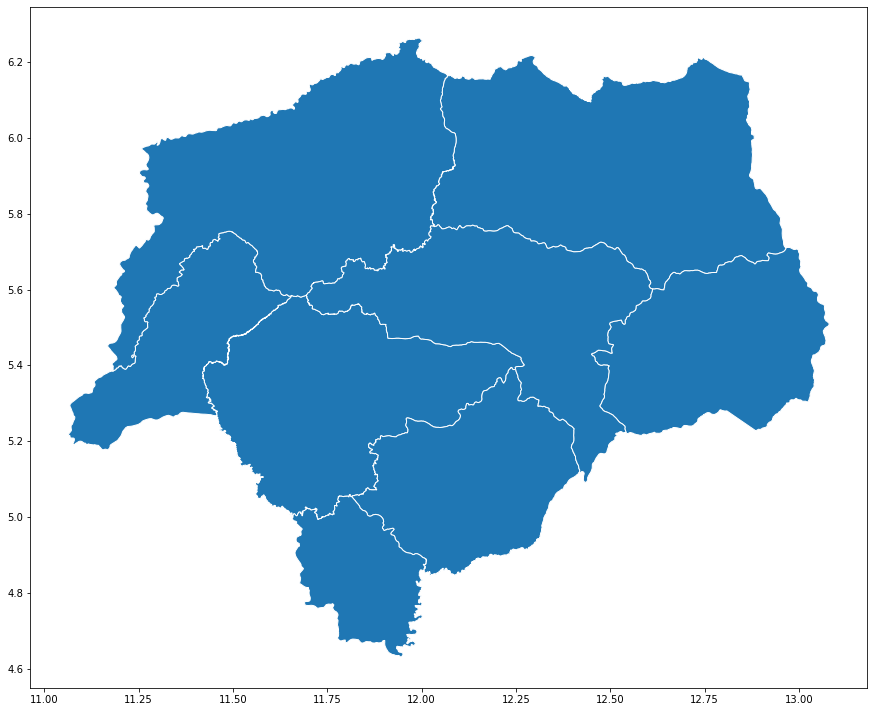

In [11]:
district.plot(figsize=(15,15), edgecolor="white")
plt.show()

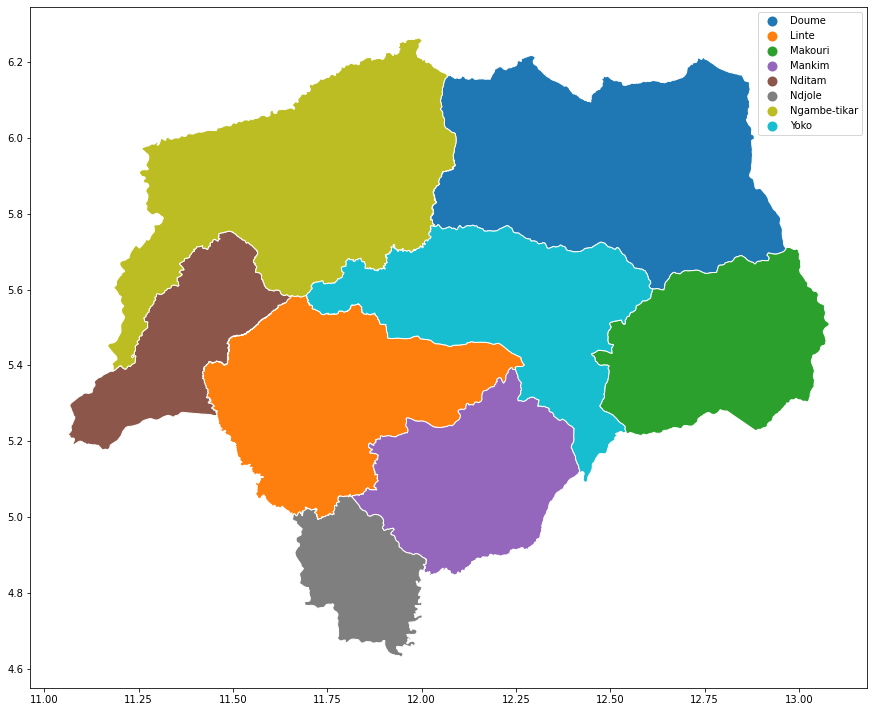

In [12]:
district.plot(figsize=(15,15), edgecolor="white", column='Nom_AS', legend=True)
plt.show()

Nous nous interesserons plus spécifiquement à l'aire de santé de NDJOLE en gris et plus au sud

#### Shapefile de l'aire de NDJOLE

In [13]:
djole_health_area = gpd.read_file('District Yoko/AS_Centre_Nom_AS__Ndjole.shp')

In [14]:
djole_health_area.shape

(1, 11)

In [15]:
type(djole_health_area)

geopandas.geodataframe.GeoDataFrame

In [16]:
djole_health_area.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

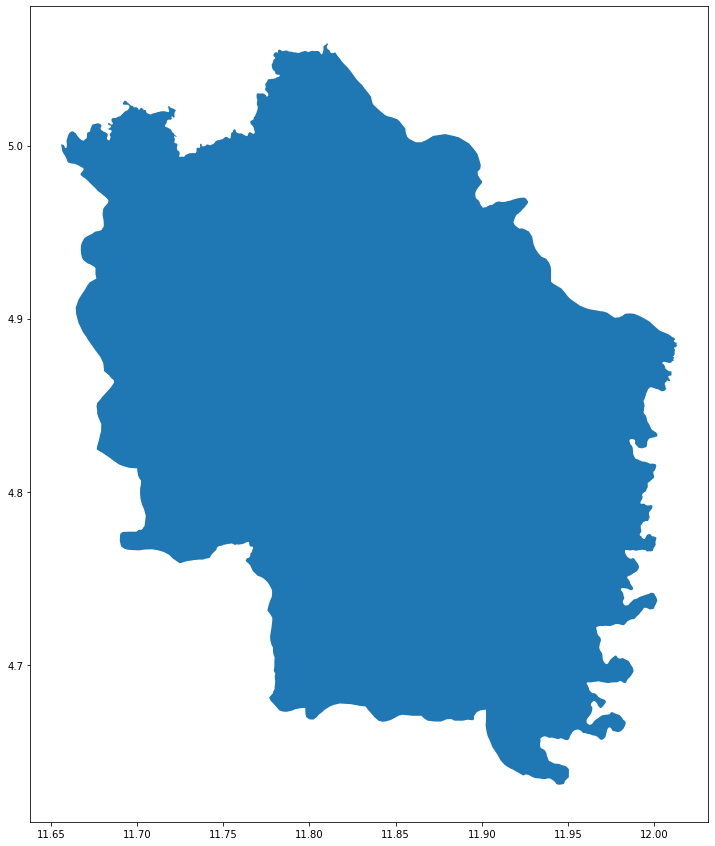

In [17]:
djole_health_area.plot(figsize=(15,15))
plt.show()

#### Shapefile des formations sanitaires

In [18]:
fosas = gpd.read_file('District Yoko/FOSA_Cameroon_DISTRICT__Yoko.shp')

In [19]:
type(fosas)

geopandas.geodataframe.GeoDataFrame

In [20]:
fosas.crs

Ce geodataframe utilise aucune coordonnée. Nous assignons la projection géographique WGS 84. La même que celle du géodataframe district

In [21]:
fosas = gpd.GeoDataFrame(fosas, geometry=fosas.geometry, crs = district.crs)

In [22]:
fosas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Ce geodataframe utilise desormais la projection géographique WGS 84

In [23]:
fosas.head()

REGION DISTRICT    HEALTH_ARE                        NAME PEV       Lat  \
0  Centre     Yoko  Ngambe Tikar     CASE DE SANTE MBIOKO II  No  5.612258   
1  Centre     Yoko  Ngambe Tikar     CABINET DE SOINS DENISE  No  5.796722   
2  Centre     Yoko  Ngambe Tikar  CSI PRIVE EEC NGAMBE TIKAR  No  5.788533   
3  Centre     Yoko  Ngambe Tikar             CSI BEING BEING  No  5.950427   
4  Centre     Yoko  Ngambe Tikar                     CSI GAH  No  5.774500   

         Lon             Altitude            Type           Accuracy  \
0  11.206133  710.799999999999950            Case  2.100000000000000   
1  11.501995  749.600000000000020              CS  2.100000000000000   
2  11.489917  738.399999999999980  Centre Medical  3.200000000000000   
3  11.542838  747.299999999999950  Centre Medical  2.000000000000000   
4  11.364153  716.000000000000000  Centre Medical  2.200000000000000   

                                          comments Form  \
0  CASE DE SANTE EN CONSTRUCTION PAR LA COMMUNAUTE  POI   
1                                             None  POI   
2                                             None  POI   
3                                             None  POI   
4                                             None  POI   

                   geometry  
0  POINT (11.20613 5.61226)  
1  POINT (11.50200 5.79672)  
2  POINT (11.48992 5.78853)  
3  POINT (11.54284 5.95043)  
4  POINT (11.36415 5.77450)

In [24]:
fosas.columns

Index(['REGION', 'DISTRICT', 'HEALTH_ARE', 'NAME', 'PEV', 'Lat', 'Lon',
       'Altitude', 'Type', 'Accuracy', 'comments', 'Form', 'geometry'],
      dtype='object')

In [25]:
fosas = fosas[['REGION', 'DISTRICT', 'HEALTH_ARE', 'NAME', 'PEV', 'Lat', 'Lon', 'Altitude', 'Type', 'Form', 'geometry']]

In [26]:
fosas.head()

REGION DISTRICT    HEALTH_ARE                        NAME PEV       Lat  \
0  Centre     Yoko  Ngambe Tikar     CASE DE SANTE MBIOKO II  No  5.612258   
1  Centre     Yoko  Ngambe Tikar     CABINET DE SOINS DENISE  No  5.796722   
2  Centre     Yoko  Ngambe Tikar  CSI PRIVE EEC NGAMBE TIKAR  No  5.788533   
3  Centre     Yoko  Ngambe Tikar             CSI BEING BEING  No  5.950427   
4  Centre     Yoko  Ngambe Tikar                     CSI GAH  No  5.774500   

         Lon             Altitude            Type Form  \
0  11.206133  710.799999999999950            Case  POI   
1  11.501995  749.600000000000020              CS  POI   
2  11.489917  738.399999999999980  Centre Medical  POI   
3  11.542838  747.299999999999950  Centre Medical  POI   
4  11.364153  716.000000000000000  Centre Medical  POI   

                   geometry  
0  POINT (11.20613 5.61226)  
1  POINT (11.50200 5.79672)  
2  POINT (11.48992 5.78853)  
3  POINT (11.54284 5.95043)  
4  POINT (11.36415 5.77450)

In [27]:
fosas.shape

(31, 11)

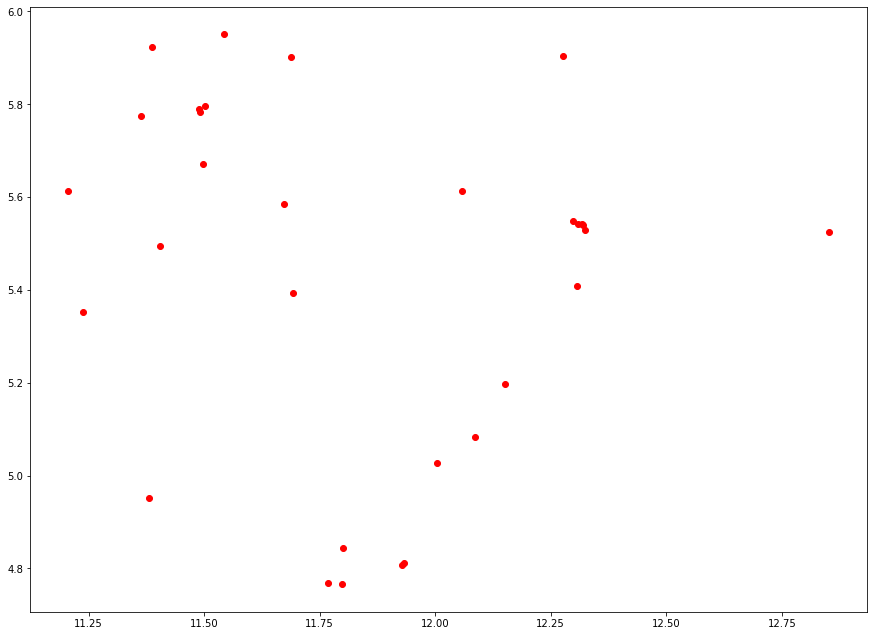

In [28]:
# Visualisation
fosas.plot(figsize=(15,15), color='red')
plt.show()

#### Fichier excel des points d'intêret (POI)

In [29]:
pois = pd.read_excel('Point_d_interets.xlsx')

In [30]:
pois.head()

start                            end  \
0  2021-03-29T14:41:58.171+01:00  2021-03-29T14:43:28.767+01:00   
1  2021-03-29T16:57:28.351+01:00  2021-03-29T16:58:20.926+01:00   
2  2019-12-09T15:13:05.704+01:00  2020-10-27T14:12:53.887+01:00   
3  2019-12-09T11:54:02.979+01:00  2020-10-27T14:14:59.979+01:00   
4  2019-12-09T11:58:58.366+01:00  2020-10-27T14:14:30.383+01:00   

   Point d'intérêt utile pour votre micro-planification. Veuillez géolocaliser ce point et collecter les infos à propos.  \
0                                                NaN                                                                       
1                                                NaN                                                                       
2                                                NaN                                                                       
3                                                NaN                                                                       
4                                                NaN                                                                       

  Quelle type de point voulez-vous renseignez ?  \
0                           Formation sanitaire   
1                           Formation sanitaire   
2                                        Marché   
3                                 Lieu de culte   
4                                 Lieu de culte   

  Si autre, précisez le type de site  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

  Nom du site (nom du chef de quartier, du relais communautaire... bref du site)  \
0                                Family health care                                
1                              Csp eec Ngambe tikar                                
2                                        Marché yoko                               
3                     Église évangélique luthérienne                               
4                                    Mosquée mengang                               

        Nom du quartier                Enregistrez les coordonnées du site  \
0  Quartier anglophone   5.788004437593621 11.479897091859803 683.59136...   
1                   Yah          5.788594068 11.473766618 748.23626709 4.9   
2                Megang  5.53883900412715 12.320761057916991 1024.59768...   
3               Mengang         5.482937602 12.385050439 767.324035645 4.9   
4               Mengang          5.482321581 12.38631651 805.058410645 4.9   

   _Enregistrez les coordonnées du site_latitude  \
0                                       5.788004   
1                                       5.788594   
2                                       5.538839   
3                                       5.482938   
4                                       5.482322   

   _Enregistrez les coordonnées du site_longitude  ...  \
0                                       11.479897  ...   
1                                       11.473767  ...   
2                                       12.320761  ...   
3                                       12.385050  ...   
4                                       12.386317  ...   

   Quelle type de point voulez-vous renseignez ?.1       _id  \
0                                              NaN  90642281   
1                                              NaN  90642283   
2                                              NaN  43120621   
3                                              NaN  42706520   
4                                              NaN  42706525   

                                  _uuid     _submission_time  \
0  23bc54d8-7fe0-47c2-94fb-a2e0a5333340  2021-03-30T14:31:43   
1  fede60ba-bae4-43a5-8837-d963bb84c50d  2021-03-30T14:31:44   
2  097cd409-01fb-4cba-8a07-b5d34ea1ca28  2019-12-15T09:43:39   
3  3d397b63-e1a0-4c83-8efe-96b834f9394b  2019-12-09T19

In [31]:
pois.shape

(281, 22)

In [32]:
pois.columns

Index(['start', 'end',
       'Point d'intérêt utile pour votre micro-planification. Veuillez géolocaliser ce point et collecter les infos à propos.',
       'Quelle type de point voulez-vous renseignez ?',
       'Si autre, précisez le type de site',
       'Nom du site (nom du chef de quartier, du relais communautaire... bref du site)',
       'Nom du quartier', 'Enregistrez les coordonnées du site',
       '_Enregistrez les coordonnées du site_latitude',
       '_Enregistrez les coordonnées du site_longitude',
       '_Enregistrez les coordonnées du site_altitude',
       '_Enregistrez les coordonnées du site_precision',
       'Quelle type de point voulez-vous renseignez ?.1', '_id', '_uuid',
       '_submission_time', '_validation_status', '_notes', '_status',
       '_submitted_by', '_tags', '_index'],
      dtype='object')

In [33]:
# Changer (Réduire) le nom des colonnes
col_dict = {
    'Quelle type de point voulez-vous renseignez ?':'Type de poi',
    'Si autre, précisez le type de site':'autre type de poi',
    'Nom du site (nom du chef de quartier, du relais communautaire... bref du site)':'Nom du poi',
    'Nom du quartier':'Quartier',
    '_Enregistrez les coordonnées du site_latitude':'Latitude',
    '_Enregistrez les coordonnées du site_longitude':'Longitude',
    '_Enregistrez les coordonnées du site_altitude':'Altitude'
}

pois.rename(columns=col_dict, inplace=True)

In [34]:
pois.head()

start                            end  \
0  2021-03-29T14:41:58.171+01:00  2021-03-29T14:43:28.767+01:00   
1  2021-03-29T16:57:28.351+01:00  2021-03-29T16:58:20.926+01:00   
2  2019-12-09T15:13:05.704+01:00  2020-10-27T14:12:53.887+01:00   
3  2019-12-09T11:54:02.979+01:00  2020-10-27T14:14:59.979+01:00   
4  2019-12-09T11:58:58.366+01:00  2020-10-27T14:14:30.383+01:00   

   Point d'intérêt utile pour votre micro-planification. Veuillez géolocaliser ce point et collecter les infos à propos.  \
0                                                NaN                                                                       
1                                                NaN                                                                       
2                                                NaN                                                                       
3                                                NaN                                                                       
4                                                NaN                                                                       

           Type de poi autre type de poi                      Nom du poi  \
0  Formation sanitaire               NaN             Family health care    
1  Formation sanitaire               NaN           Csp eec Ngambe tikar    
2               Marché               NaN                     Marché yoko   
3        Lieu de culte               NaN  Église évangélique luthérienne   
4        Lieu de culte               NaN                 Mosquée mengang   

               Quartier                Enregistrez les coordonnées du site  \
0  Quartier anglophone   5.788004437593621 11.479897091859803 683.59136...   
1                   Yah          5.788594068 11.473766618 748.23626709 4.9   
2                Megang  5.53883900412715 12.320761057916991 1024.59768...   
3               Mengang         5.482937602 12.385050439 767.324035645 4.9   
4               Mengang          5.482321581 12.38631651 805.058410645 4.9   

   Latitude  Longitude  ...  Quelle type de point voulez-vous renseignez ?.1  \
0  5.788004  11.479897  ...                                              NaN   
1  5.788594  11.473767  ...                                              NaN   
2  5.538839  12.320761  ...                                              NaN   
3  5.482938  12.385050  ...                                              NaN   
4  5.482322  12.386317  ...                                              NaN   

        _id                                 _uuid     _submission_time  \
0  90642281  23bc54d8-7fe0-47c2-94fb-a2e0a5333340  2021-03-30T14:31:43   
1  90642283  fede60ba-bae4-43a5-8837-d963bb84c50d  2021-03-30T14:31:44   
2  43120621  097cd409-01fb-4cba-8a07-b5d34ea1ca28  2019-12-15T09:43:39   
3  42706520  3d397b63-e1a0-4c83-8efe-96b834f9394b  2019-12-09T19:04:31   
4  42706525  26d22340-17b4-4972-be51-e1ac296ce775  2019-12-09T19:04:32   

  _validation_status _notes            _status  _submitted_by _tags _index  
0                NaN    NaN  submitted_via_web        djatche   NaN      1  
1                NaN    NaN  submitted_via_web        djatche   NaN      2  
2                NaN    NaN  submitted_via_web        djatche   NaN      3  
3                NaN    NaN  submitted_via_web        djatche   NaN      4  
4                NaN    NaN  submitted_via_web        djatche   NaN      5  

[5 rows x 22 columns]

In [35]:
cols = list(col_dict.values())
cols

['Type de poi',
 'autre type de poi',
 'Nom du poi',
 'Quartier',
 'Latitude',
 'Longitude',
 'Altitude']

In [36]:
pois = pois[cols]

In [37]:
pois.head()

Type de poi autre type de poi                      Nom du poi  \
0  Formation sanitaire               NaN             Family health care    
1  Formation sanitaire               NaN           Csp eec Ngambe tikar    
2               Marché               NaN                     Marché yoko   
3        Lieu de culte               NaN  Église évangélique luthérienne   
4        Lieu de culte               NaN                 Mosquée mengang   

               Quartier  Latitude  Longitude     Altitude  
0  Quartier anglophone   5.788004  11.479897   683.591363  
1                   Yah  5.788594  11.473767   748.236267  
2                Megang  5.538839  12.320761  1024.597680  
3               Mengang  5.482938  12.385050   767.324036  
4               Mengang  5.482322  12.386317   805.058411

In [38]:
pois.shape

(281, 7)

In [39]:
type(pois)

pandas.core.frame.DataFrame

##### Pour faciliter les analyse spatiales, il faut transformer ce dataframe en geodataframe

In [40]:
pois['geometry'] = pois.apply(lambda x : Point(x.Longitude, x.Latitude), axis=1)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [41]:
pois.head()

Type de poi autre type de poi                      Nom du poi  \
0  Formation sanitaire               NaN             Family health care    
1  Formation sanitaire               NaN           Csp eec Ngambe tikar    
2               Marché               NaN                     Marché yoko   
3        Lieu de culte               NaN  Église évangélique luthérienne   
4        Lieu de culte               NaN                 Mosquée mengang   

               Quartier  Latitude  Longitude     Altitude  \
0  Quartier anglophone   5.788004  11.479897   683.591363   
1                   Yah  5.788594  11.473767   748.236267   
2                Megang  5.538839  12.320761  1024.597680   
3               Mengang  5.482938  12.385050   767.324036   
4               Mengang  5.482322  12.386317   805.058411   

                                       geometry  
0  POINT (11.479897091859804 5.788004437593621)  
1              POINT (11.473766618 5.788594068)  
2   POINT (12.320761057916991 5.53883900412715)  
3              POINT (12.385050439 5.482937602)  
4               POINT (12.38631651 5.482321581)

Une colonne nouvelle geometry avec les valeur de type Point

In [42]:
type(pois)

pandas.core.frame.DataFrame

In [43]:
pois_geo = gpd.GeoDataFrame(pois, geometry=pois.geometry, crs = district.crs)

In [44]:
type(pois_geo)

geopandas.geodataframe.GeoDataFrame

In [45]:
pois_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
pois_geo['Type de poi'].value_counts(dropna=False)

Carrefour                                                    46
Site de stratégie avancée (vaccination, CPN recentrée...)    38
Source d'eau                                                 37
Domicile de relais de communautaire                          30
Lieu de culte                                                24
Domicile de chef de quartier                                 24
Autre                                                        23
Ecole                                                        20
Formation sanitaire                                          16
Pont                                                          9
Marché                                                        7
Domicile de tradi-praticien                                   5
NaN                                                           1
Site de distribution de MILDA                                 1
Name: Type de poi, dtype: int64

In [47]:
pois_geo['Type de poi'].value_counts(dropna=False).sum()

281

On dénombre 281 POI dont 23 autres pois sans catégories se présentent comme suit:

In [48]:
pois_geo['autre type de poi'].unique()

array([nan, 'Auberge', 'Poste agricole', 'Gare routière', 'Agence voyage',
       'Restaurant', 'Gendarmerie ', 'Stèle centenaire église catholique',
       "Société d'exploitation forestière", 'Talla', 'Foyer ',
       'Gare routière ', 'Limite entre zone yoko-ntui(issandja-nguila)',
       'Une Vallé avec rivière', 'Village ',
       'Piste cacaoyère- vers cosovo', 'Un quartier', 'Bord ', 'Quartier',
       'Acoucheuse traditionnelle', 'Bac de Bioko (fleuve Mbam)',
       'Bac debioko', 'CS family haerth care', 'Parc national maoendjim'],
      dtype=object)

In [49]:
pois_geo['autre type de poi'] = pois_geo['autre type de poi'].apply(lambda x:str(x).strip())

In [50]:
pois_geo['autre type de poi'].unique()

array(['nan', 'Auberge', 'Poste agricole', 'Gare routière',
       'Agence voyage', 'Restaurant', 'Gendarmerie',
       'Stèle centenaire église catholique',
       "Société d'exploitation forestière", 'Talla', 'Foyer',
       'Limite entre zone yoko-ntui(issandja-nguila)',
       'Une Vallé avec rivière', 'Village',
       'Piste cacaoyère- vers cosovo', 'Un quartier', 'Bord', 'Quartier',
       'Acoucheuse traditionnelle', 'Bac de Bioko (fleuve Mbam)',
       'Bac debioko', 'CS family haerth care', 'Parc national maoendjim'],
      dtype=object)

In [51]:
pois_geo['autre type de poi'].value_counts()

nan                                             258
Gare routière                                     2
Une Vallé avec rivière                            1
CS family haerth care                             1
Bac debioko                                       1
Bac de Bioko (fleuve Mbam)                        1
Acoucheuse traditionnelle                         1
Quartier                                          1
Bord                                              1
Un quartier                                       1
Piste cacaoyère- vers cosovo                      1
Village                                           1
Limite entre zone yoko-ntui(issandja-nguila)      1
Auberge                                           1
Foyer                                             1
Talla                                             1
Société d'exploitation forestière                 1
Stèle centenaire église catholique                1
Gendarmerie                                       1
Restaurant  

In [52]:
pois_geo['autre type de poi'].unique()

array(['nan', 'Auberge', 'Poste agricole', 'Gare routière',
       'Agence voyage', 'Restaurant', 'Gendarmerie',
       'Stèle centenaire église catholique',
       "Société d'exploitation forestière", 'Talla', 'Foyer',
       'Limite entre zone yoko-ntui(issandja-nguila)',
       'Une Vallé avec rivière', 'Village',
       'Piste cacaoyère- vers cosovo', 'Un quartier', 'Bord', 'Quartier',
       'Acoucheuse traditionnelle', 'Bac de Bioko (fleuve Mbam)',
       'Bac debioko', 'CS family haerth care', 'Parc national maoendjim'],
      dtype=object)

In [53]:
pois_geo['autre type de poi'].value_counts().sum()

281

Les "autres" POI peuvent être encore categorisés en:     
    - "Hotel et Restaurant"      
    - "Gare routière et Agence"        
    - "Domicile Accoucheuse traditionnelle"      
    - "Edifice public" (bac, gendarmerie, poste agricole)      
    - "Monument" (stèle)       
    - "Bâtiment privé" (foyer, Société d'exploitation forestière )  
    - "Parc"

In [54]:
dict_poi = {
    "Auberge":"Hotel et Restaurant",
    "Restaurant":"Hotel et Restaurant",
    "Gare routière":"Gare routière et Agence",
    "Agence voyage":"Gare routière et Agence",
    "Gendarmerie":"Edifice public",
    "Bac de Bioko (fleuve Mbam)":"Edifice public",
    "Bac debioko":"Edifice public",
    "Poste agricole":"Edifice public",
    "Stèle centenaire église catholique":"Monument",
    "Foyer":"Bâtiment privé",
    "Société d'exploitation forestière":"Bâtiment privé",
    "Parc national maoendjim":"Parc",
    "Acoucheuse traditionnelle":"Domicile Accoucheuse traditionnelle"
}

In [55]:
pois_geo["autre type de poi"].replace(dict_poi, inplace=True)

In [56]:
pois_geo['autre type de poi'].value_counts()

nan                                             258
Edifice public                                    4
Gare routière et Agence                           3
Bâtiment privé                                    2
Hotel et Restaurant                               2
Un quartier                                       1
CS family haerth care                             1
Domicile Accoucheuse traditionnelle               1
Quartier                                          1
Bord                                              1
Une Vallé avec rivière                            1
Piste cacaoyère- vers cosovo                      1
Village                                           1
Limite entre zone yoko-ntui(issandja-nguila)      1
Talla                                             1
Monument                                          1
Parc                                              1
Name: autre type de poi, dtype: int64

In [57]:
list(pois_geo['autre type de poi'].value_counts().keys())

['nan',
 'Edifice public',
 'Gare routière et Agence',
 'Bâtiment privé',
 'Hotel et Restaurant',
 'Un quartier',
 'CS family haerth care',
 'Domicile Accoucheuse traditionnelle',
 'Quartier',
 'Bord',
 'Une Vallé avec rivière',
 'Piste cacaoyère- vers cosovo',
 'Village',
 'Limite entre zone yoko-ntui(issandja-nguila)',
 'Talla',
 'Monument',
 'Parc']

In [58]:
autres_pois = [
 'Un quartier',
 'CS family haerth care',
 'Quartier',
 'Une Vallé avec rivière',
 'Piste cacaoyère- vers cosovo',
 'Village',
 'Limite entre zone yoko-ntui(issandja-nguila)',
 'Talla']

In [59]:
pois_geo = pois_geo[~pois_geo['autre type de poi'].isin(autres_pois)]

In [60]:
pois_geo.shape

(273, 8)

In [61]:
pois_geo.isnull().sum()

Type de poi           1
autre type de poi     0
Nom du poi            4
Quartier             36
Latitude              3
Longitude             3
Altitude              3
geometry              0
dtype: int64

In [62]:
pois_geo.loc[pois_geo['Type de poi'].isna()]

Type de poi autre type de poi                  Nom du poi    Quartier  \
34         NaN               nan   Ecole publique de Ndjolé   Ndjole sud   

    Latitude  Longitude    Altitude                  geometry  
34  4.810355  11.934728  659.026978  POINT (11.93473 4.81036)

In [63]:
pois_geo.loc[pois_geo['Type de poi'].isna(), 'Type de poi'] = 'Ecole'

In [64]:
pois_geo['autre type de poi'].value_counts(dropna=False)

nan                                    258
Edifice public                           4
Gare routière et Agence                  3
Hotel et Restaurant                      2
Bâtiment privé                           2
Monument                                 1
Bord                                     1
Domicile Accoucheuse traditionnelle      1
Parc                                     1
Name: autre type de poi, dtype: int64

In [65]:
pois_geo['Type de poi'].value_counts(dropna=False)

Carrefour                                                    46
Site de stratégie avancée (vaccination, CPN recentrée...)    38
Source d'eau                                                 37
Domicile de relais de communautaire                          30
Lieu de culte                                                24
Domicile de chef de quartier                                 24
Ecole                                                        21
Formation sanitaire                                          16
Autre                                                        15
Pont                                                          9
Marché                                                        7
Domicile de tradi-praticien                                   5
Site de distribution de MILDA                                 1
Name: Type de poi, dtype: int64

In [66]:
pois_geo['Type de poi'].value_counts(dropna=False).sum()

273

In [67]:
def change_autre(row):
    if row['Type de poi']=="Autre":
        return row['autre type de poi']
    else:
        return row['Type de poi']

In [68]:
pois_geo['Type de poi'] = pois_geo.apply(change_autre, axis=1)

In [69]:
pois_geo['Type de poi'].value_counts()

Carrefour                                                    46
Site de stratégie avancée (vaccination, CPN recentrée...)    38
Source d'eau                                                 37
Domicile de relais de communautaire                          30
Lieu de culte                                                24
Domicile de chef de quartier                                 24
Ecole                                                        21
Formation sanitaire                                          16
Pont                                                          9
Marché                                                        7
Domicile de tradi-praticien                                   5
Edifice public                                                4
Gare routière et Agence                                       3
Bâtiment privé                                                2
Hotel et Restaurant                                           2
Monument                                

On note un grand nombre de POI de type "carrefour". A la place on aurait collecter des géotraces en lieu et place des points

In [70]:
type(pois_geo)

geopandas.geodataframe.GeoDataFrame

In [71]:
pois_geo.shape

(273, 8)

In [72]:
pois_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Fichier geojson des limites administratives au niveau arrondissement

In [73]:
cam_3 = gpd.read_file('Cameroon/geoBoundaries-CMR-ADM3_simplified.geojson')

In [74]:
cam_3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [75]:
type(cam_3)

geopandas.geodataframe.GeoDataFrame

In [76]:
cam_3.head()

shapeName LEVEL                    shapeID shapeGroup shapeType  \
0    Mbonge  ADM3  CMR-ADM3-9386221B74639934        CMR      ADM3   
1     Magba  ADM3  CMR-ADM3-9386221B98957904        CMR      ADM3   
2   MÃ©long  ADM3  CMR-ADM3-9386221B81801168        CMR      ADM3   
3   FokouÃ©  ADM3  CMR-ADM3-9386221B70926471        CMR      ADM3   
4    Bibemi  ADM3  CMR-ADM3-9386221B31900212        CMR      ADM3   

                                            geometry  
0  POLYGON ((9.07986 4.53938, 9.08100 4.53615, 9....  
1  POLYGON ((10.91321 6.01616, 10.91051 6.01397, ...  
2  POLYGON ((9.84789 5.33234, 9.83914 5.33501, 9....  
3  POLYGON ((10.03658 5.33048, 10.04007 5.32672, ...  
4  POLYGON ((13.53368 9.31790, 13.53306 9.31456, ...

In [77]:
for arr in cam_3.shapeName.unique():
    print(arr)

Mbonge
Magba
MÃ©long
FokouÃ©
Bibemi
Fonfuka
Nwa
Ambam
BaschÃ©o
Ngoura
Dir
Fundong
Mayo-Oulo
Bandja
BangangtÃ©
Bikok
Mbankomo
Malentouen
Benakuma
Touboro
Santchou
Zhoa
Nitoukou
Bengbis
BarÃ©
Nguti
BÃ©ka
Bamenda II
Ngoro
Nkolafamba
Douala VI
Galim
Nanga-Eboko
KÃ©ttÃ©
Kar-Hay
Yokadouma
Belo
Dziguilao
Logone-Birni
Mamfe
Mouloundou
Mokolo
Dikome-Balue
KaÃ©lÃ©
Akonolinga
Ekondo-Titi
NgambÃ©-Tikar
Ngan'ha
Yingui
Mbiame
Banyo
Martap
Tombel
YaoundÃ© III
YaoundÃ© IV
Tabati
Pitoa
Rey-Bouba
Ayos
Bafoussam I
Wum
Bokito
Akwaya
Campo
Mboma
Nkondjock
Njimom
Bafoussam II
Deuk
BÃ©tarÃ©-Oya
NdikinimÃ©ki
NdÃ©lÃ©lÃ©
Furu-Awa
Douala IV
Djohong
Efoulan
Goulfey
Tchatibali
Bankim
Garoua-BoulaÃ¯
Kribi II
Toko
Yabassi
Yoko
LokoundjÃ©
Waza
Pete-Bandjoun
Wina
Messock
Mouanko
Bondjock
Ma'an
Batouri
Edzendouan
Lembe Yezoum
Mbouda
Ako
Mozogo
Mudemba
Bamusso
Batchenga
Hina
Konye
Bamenda III
Meyomessala
Ebolowa I
Maroua II
Mindif
Ndu
BÃ©lel
Galim-TignÃ¨re
AkoÃ©man
Bassamba
Eyumodjock
GuÃ©rÃ©
Makary
Meiganga
Ntui
Mintom

In [78]:
len(cam_3.shapeName.unique())

360

On dénombre 360 arrondissements

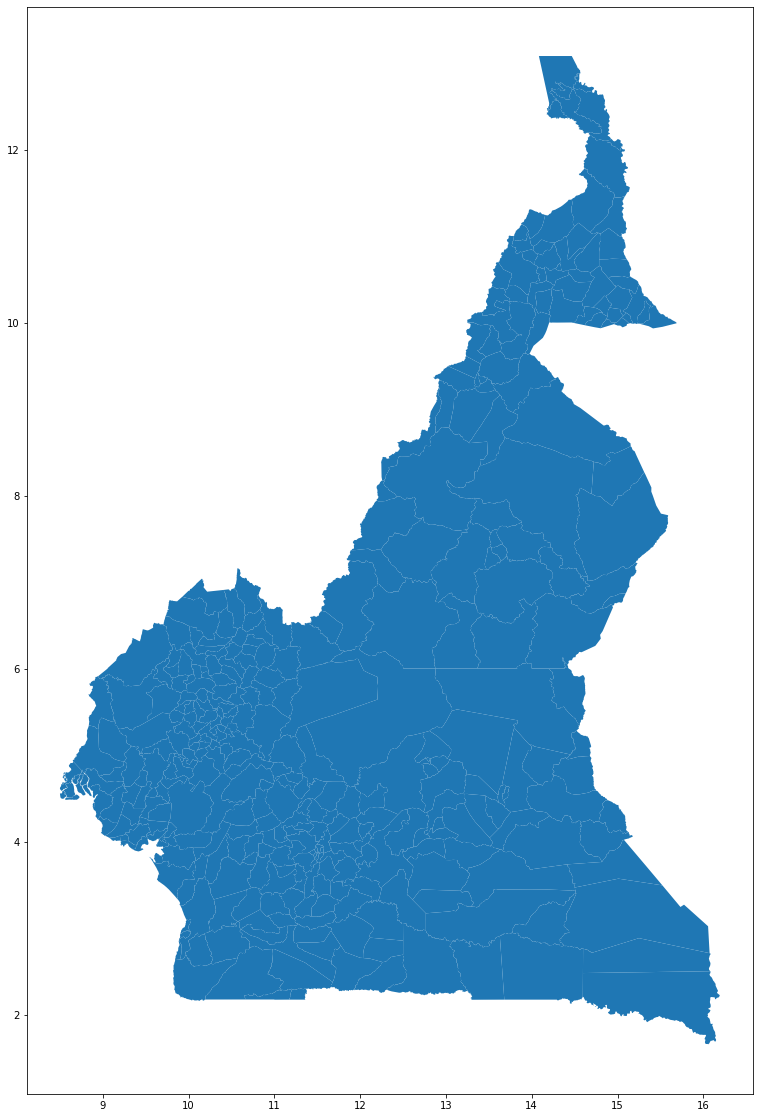

In [79]:
#Visualisation des arrondissements
cam_3.plot(figsize=(20,20))
plt.show()

On extrait les 2 arrondissements qui constituent le district (YOKO, NGAMBE TIKAR)

In [80]:
cam_adm_district_yoko = cam_3[cam_3.shapeName.isin(['Yoko', 'NgambÃ©-Tikar'])]

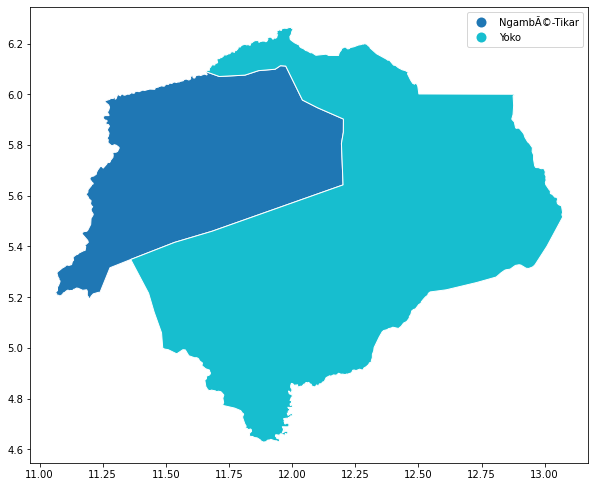

In [81]:
cam_adm_district_yoko.plot(column='shapeName', legend=True, figsize=(10,10), edgecolor='white')
plt.show()

### Comment visualiser plusieurs couches sur un même graphique

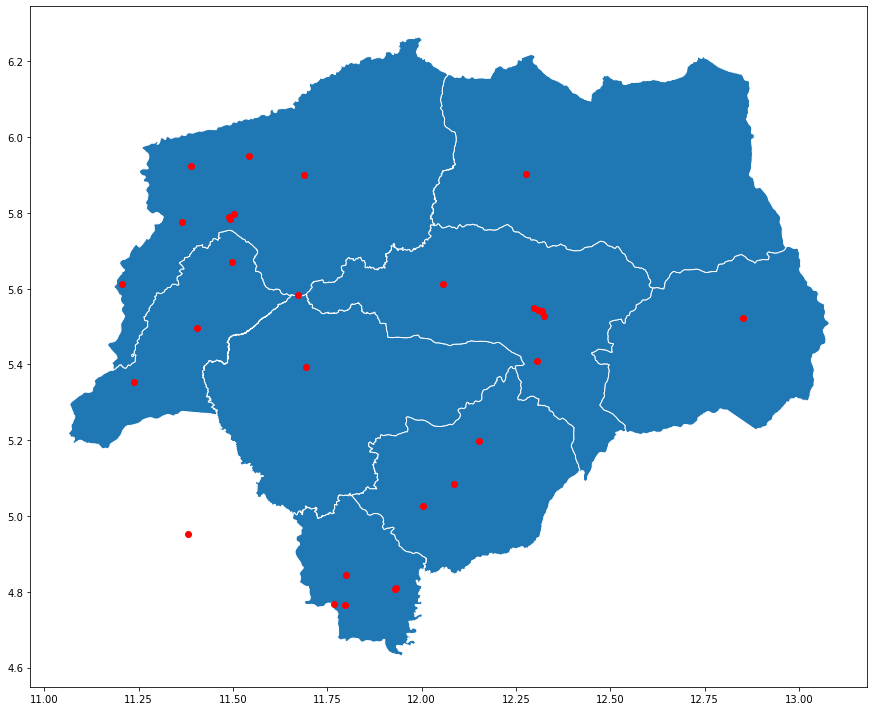

In [82]:
# Visualiser la couche des aires et celles des formations sanitaires
f, ax = plt.subplots(figsize=(15,15))
district.plot(ax=ax, edgecolor='white')
fosas.plot(ax=ax, color='red')
plt.show()

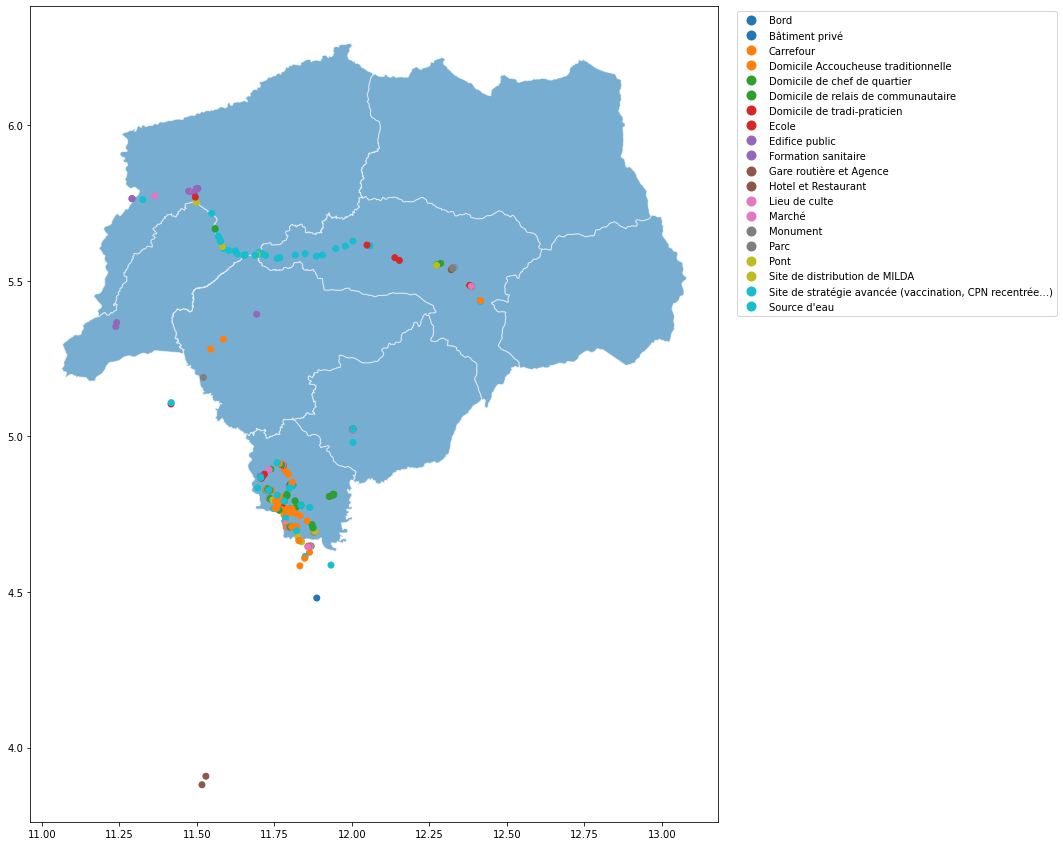

In [83]:
# Visualiser la couche des aires et celles des points d'intêret
f, ax = plt.subplots(figsize=(15,15))
district.plot(ax=ax, edgecolor='white', alpha=0.6)
pois_geo.plot(ax=ax,column='Type de poi', legend=True, legend_kwds={'bbox_to_anchor': (1.5, 1)})
plt.show()

Certains points d'intêret se retrouvent hors des limites du districts surtout au niveau de l'aire de NDJOLE au sud du district

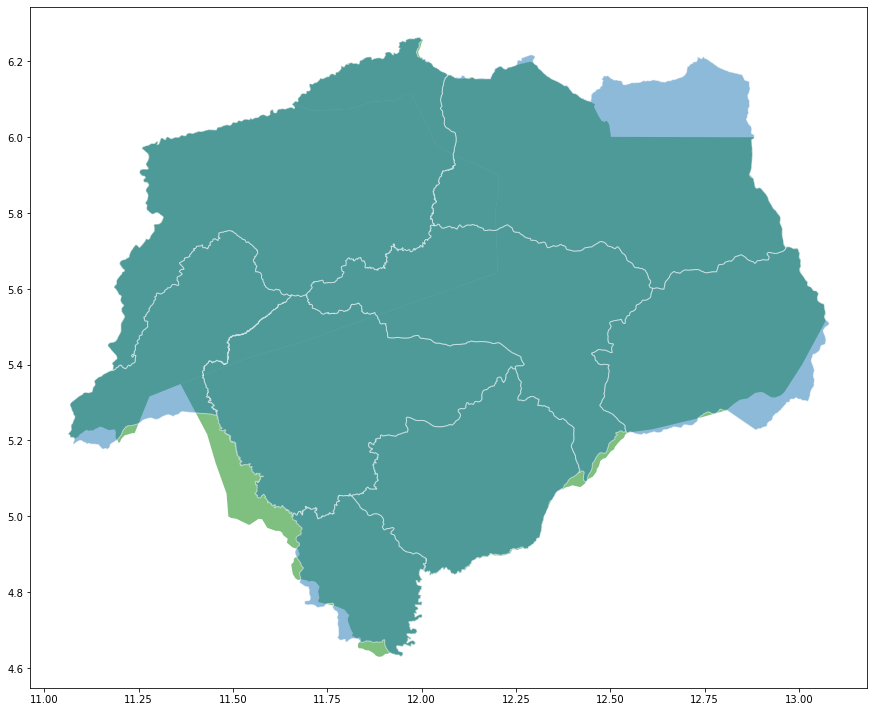

In [84]:
# Visualiser la couche des aires et celles des limites administratives des arrondissements de YOKO et NGAMBE TIKAR
f, ax = plt.subplots(figsize=(15,15))
cam_adm_district_yoko.plot(ax=ax, color='green', alpha=0.5)
district.plot(ax=ax, alpha=0.5, edgecolor='white')
plt.show()

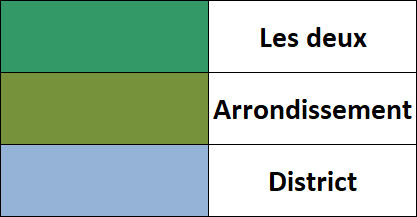

On constate que la carte du district de santé ne matche pas avec celle des limites administratives. Ce qui peut expliquer le fait que certains POI au niveau de NDJOLE dans le sud se retrouve hors des limites du district

### Analyse spatiale de type jointure pour récupérer seulement les POI qui se trouvent dans l'aire de NDJOLE

In [85]:
pois_in_djole = gpd.sjoin(pois_geo, djole_health_area, op='within')

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [86]:
pois_in_djole.head()

Type de poi        autre type de poi  \
25            Lieu de culte                      nan   
26  Gare routière et Agence  Gare routière et Agence   
27                   Marché                      nan   
28             Source d'eau                      nan   
31             Source d'eau                      nan   

                   Nom du poi         Quartier  Latitude  Longitude  \
25  Mission du plein évangile        Minfoumbe  4.843833  11.800301   
26    Gare routière Minfoumbe        Minfoumbe  4.845788  11.801163   
27           Marché minfoumbe        Minfoumbe  4.845411  11.801219   
28                     MEBAM   Issandja centre  4.765801  11.770559   
31              Forage Ndjolé      Ndjolé nord  4.813052  11.940201   

      Altitude                  geometry  index_right  OBJECTID_1  Id  Nom_AS  \
25  653.067566  POINT (11.80030 4.84383)            0        1666   0  Ndjole   
26  654.707825  POINT (11.80116 4.84579)            0        1666   0  Ndjole   
27  659.604919  POINT (11.80122 4.84541)            0        1666   0  Ndjole   
28  665.143000  POINT (11.77056 4.76580)            0        1666   0  Ndjole   
31  660.117493  POINT (11.94020 4.81305)            0        1666   0  Ndjole   

   Nom_Dist Source1     Source2  Code_AS Source3  Region         Area  
25     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
26     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
27     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
28     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
31     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743

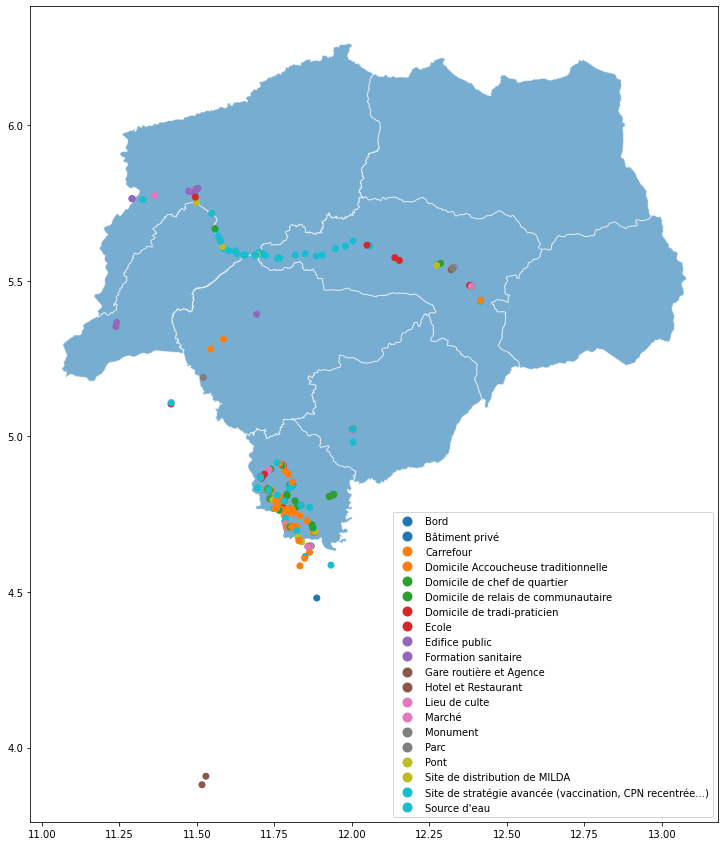

In [87]:
#visualisation de tous les POI dans le district
f, ax = plt.subplots(figsize=(15,15))
district.plot(ax=ax, edgecolor='white', alpha=0.6)
pois_geo.plot(ax=ax,column='Type de poi', legend=True)
plt.show()

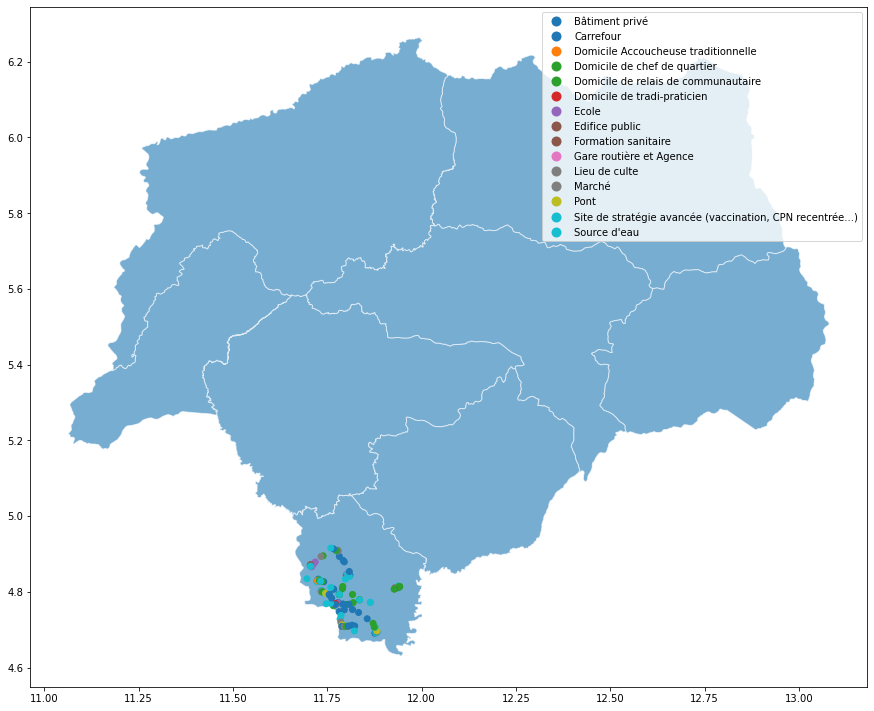

In [88]:
#visualisation uniquement des POI de l'aire de NDJOLE dans tout le district.
f, ax = plt.subplots(figsize=(15,15))
district.plot(ax=ax, edgecolor='white', alpha=0.6)
pois_in_djole.plot(ax=ax,column='Type de poi', legend=True)
plt.show()

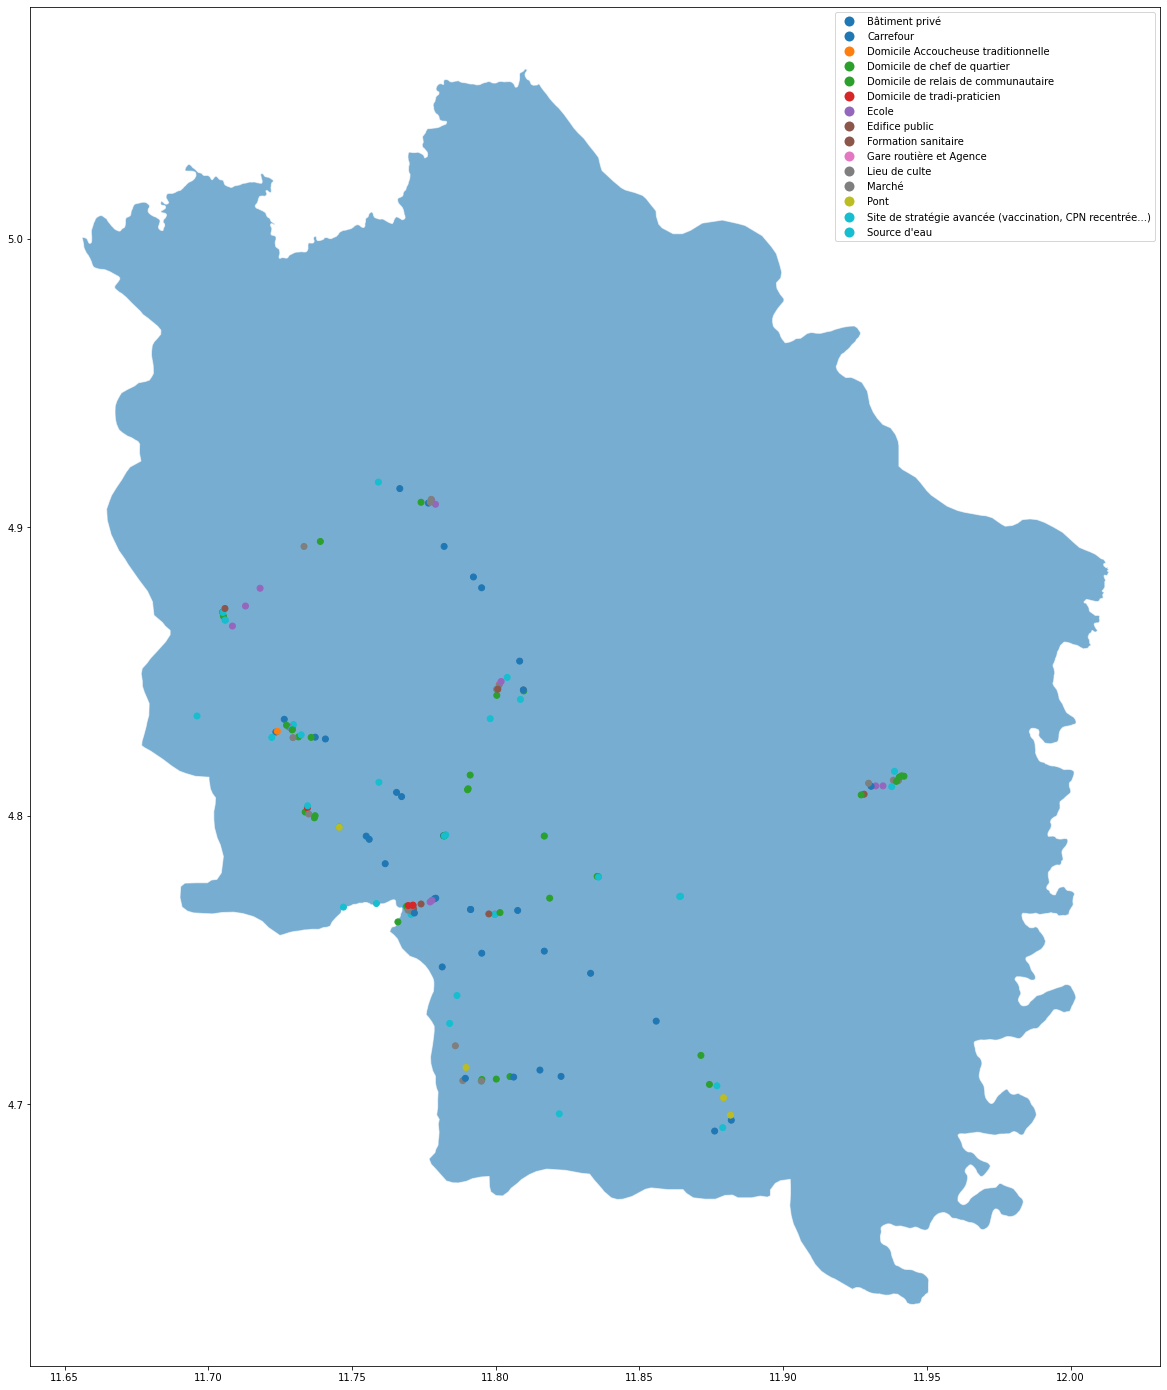

In [89]:
#visualisation uniquement de l'aire de NDJOLE avec ces POI.
f, ax = plt.subplots(figsize=(25,25))
djole_health_area.plot(ax=ax, edgecolor='white', alpha=0.6)
pois_in_djole.plot(ax=ax,column='Type de poi', legend=True)
plt.show()

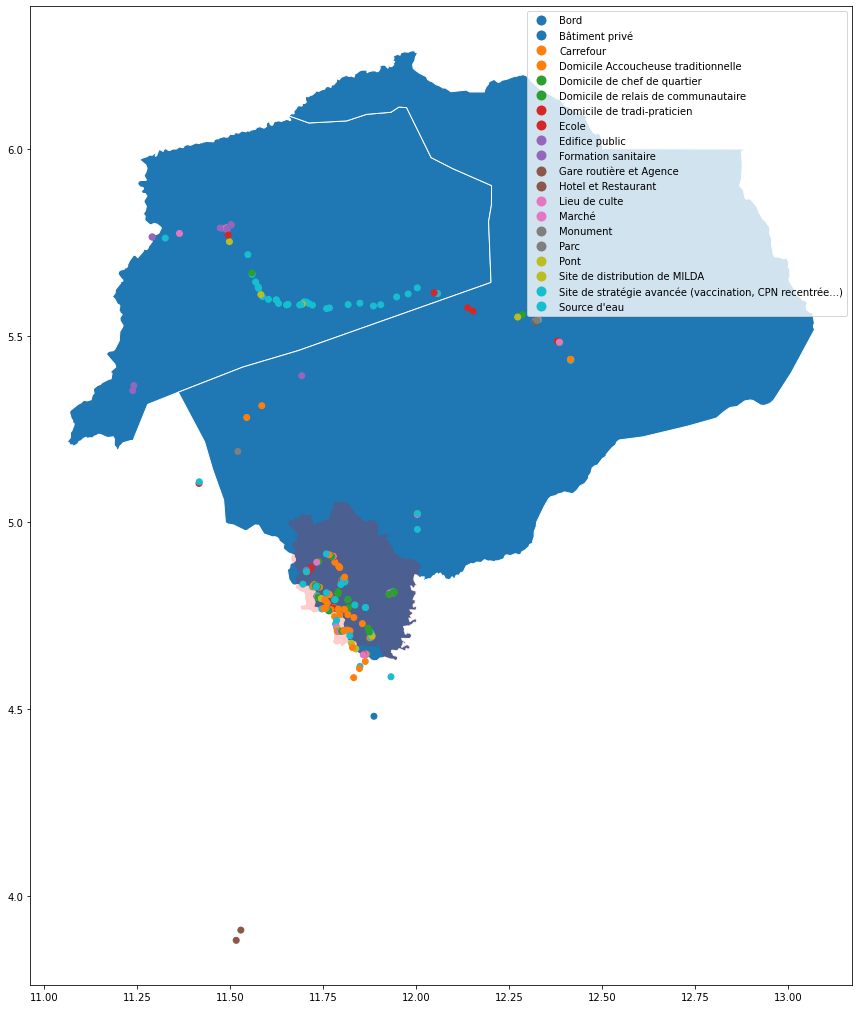

In [90]:
#visualisation uniquement de l'aire de NDJOLE avec ces POI et les limites administratives
f, ax = plt.subplots(figsize=(18,18))
cam_adm_district_yoko.plot(ax=ax, edgecolor='white')
djole_health_area.plot(ax=ax, color='red', alpha=0.2)
pois_geo.plot(ax=ax,column='Type de poi', legend=True)
plt.show()

### Analyse spatiale de type jointure pour récupérer seulement les FOSA qui se trouvent dans l'aire de NDJOLE

In [91]:
fosas_in_djole = gpd.sjoin(fosas, djole_health_area, op='within')

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


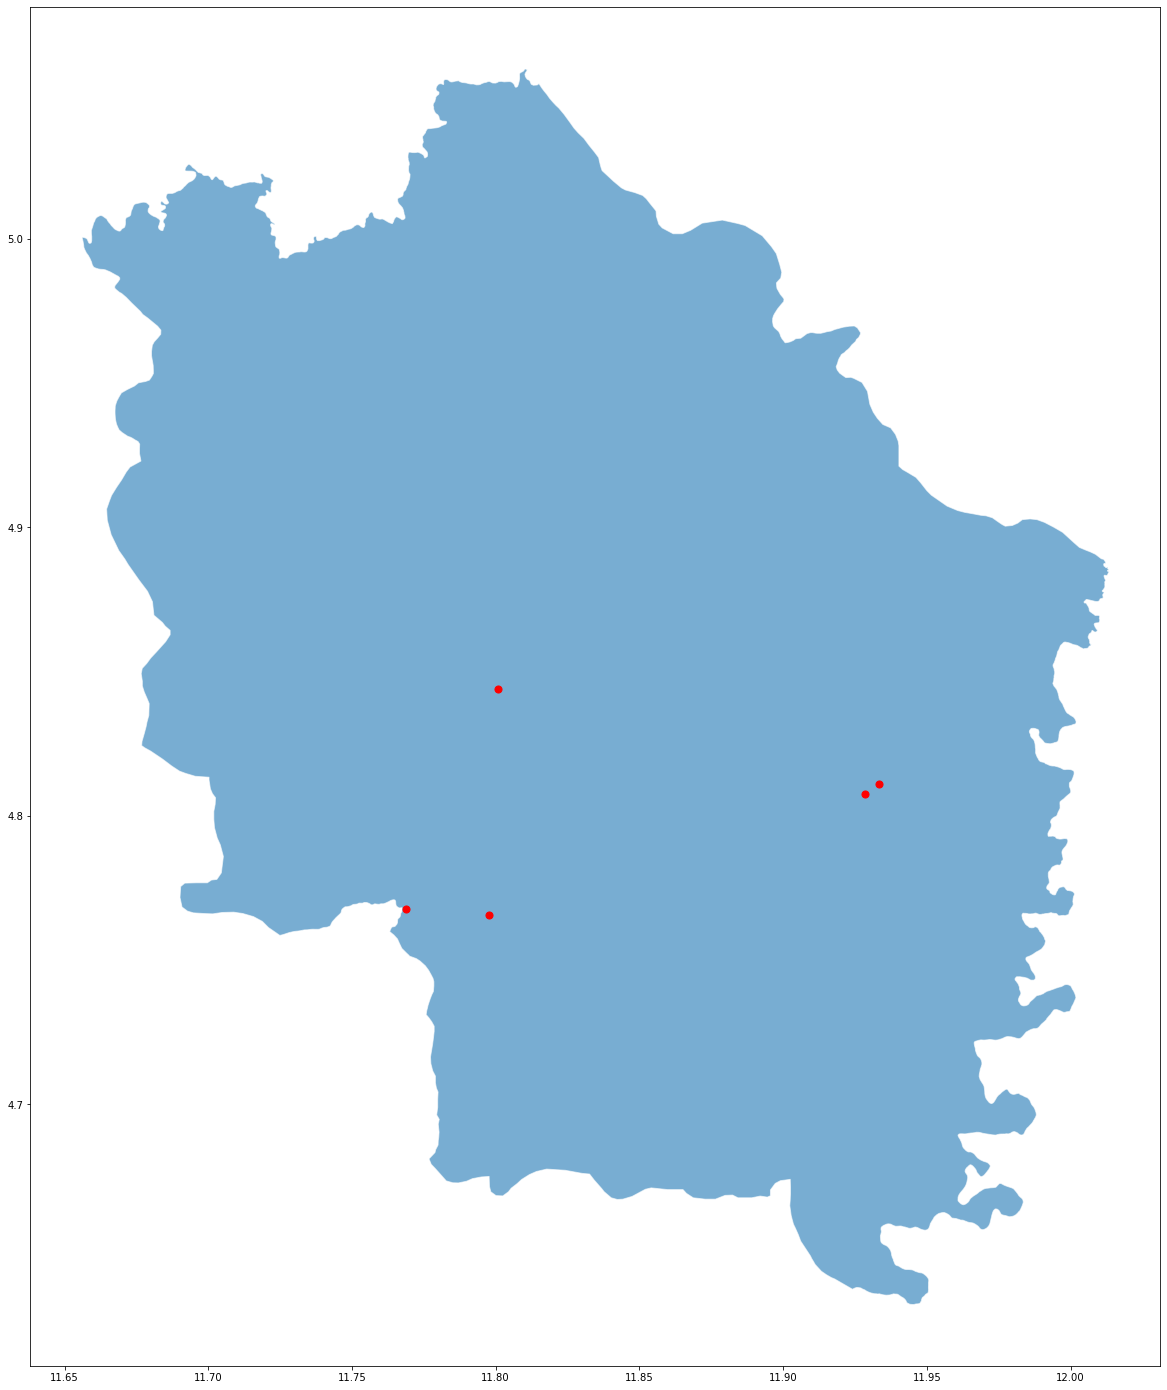

In [92]:
# Visualisation des FOSA dans l'aire de NDJOLE
f, ax = plt.subplots(figsize=(25,25))
djole_health_area.plot(ax=ax, edgecolor='white', alpha=0.6)
fosas_in_djole.plot(ax=ax,color='red', markersize=50, legend=True)
plt.show()

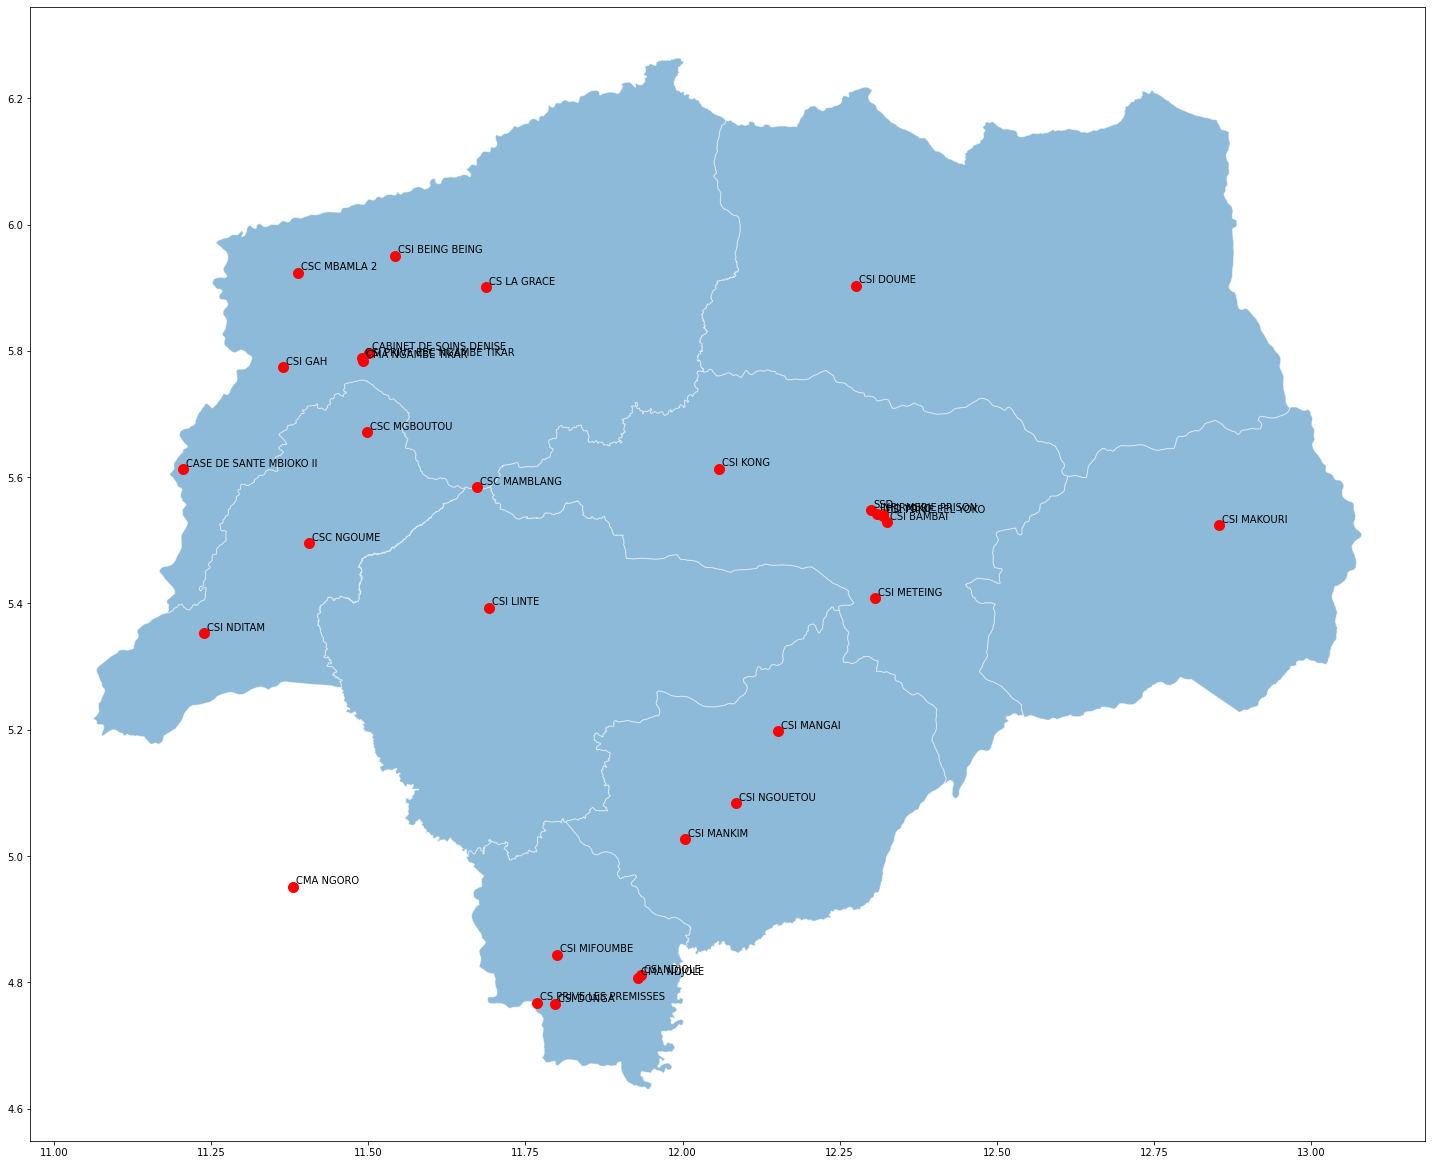

In [93]:
# Visualisation avec annotation
ax = district.plot(figsize=(25,25), edgecolor='white', alpha=0.5)
fosas.plot(ax=ax, markersize=100, color='red')

for x, y, label in zip(fosas.geometry.x, fosas.geometry.y, fosas.NAME):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.show()

### Conversion des géodataframe en projection utm
##### La coordonnée projetées pour la zone étudiée est : WGS 84 / UTM zone 32N EPSG:32632

In [94]:
district_utm_32632 = district.to_crs(epsg=32632)
fosas_utm_32632 = fosas.to_crs(epsg=32632)
pois_utm_32632 = pois_geo.to_crs(epsg=32632)
pois_in_djole_utm_32632 = pois_in_djole.to_crs(epsg=32632)
djole_health_area_utm_32632 = djole_health_area.to_crs(epsg=32632)

In [95]:
district_utm_32632.crs

<Derived Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [96]:
pois_in_djole_utm_32632.crs

<Derived Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [97]:
fosas_utm_32632.crs

<Derived Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Sauvegarder les géodataframes avec la nouvelle projection sous forme de fichiers (shapefile ou gpkg)

In [98]:
# Write converted data to a file
district_utm_32632.to_file("data_output/gpkg/district_utm_32632.gpkg",driver="GPKG")
district_utm_32632.to_file("data_output/shapefile/district_utm_32632.shp",driver="ESRI Shapefile")

In [99]:
# Write converted data to a file
fosas_utm_32632.to_file("data_output/gpkg/fosa_utm_32632.gpkg",driver="GPKG")
fosas_utm_32632.to_file("data_output/shapefile/fosa_utm_32632.shp",driver="ESRI Shapefile")

In [100]:
# Write converted data to a file
pois_utm_32632.to_file("data_output/gpkg/pois_utm_32632.gpkg",driver="GPKG")
pois_utm_32632.to_file("data_output/shapefile/pois_utm_32632.shp",driver="ESRI Shapefile")

C:\Users\hp\AppData\Local\Temp\ipykernel_16320\2115810416.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pois_utm_32632.to_file("data_output/shapefile/pois_utm_32632.shp",driver="ESRI Shapefile")


In [101]:
# Write converted data to a file
pois_in_djole_utm_32632.to_file("data_output/gpkg/pois_in_djole_utm_32632.gpkg",driver="GPKG")
pois_in_djole_utm_32632.to_file("data_output/shapefile/pois_in_djole_utm_32632.shp",driver="ESRI Shapefile")

C:\Users\hp\AppData\Local\Temp\ipykernel_16320\3864638538.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pois_in_djole_utm_32632.to_file("data_output/shapefile/pois_in_djole_utm_32632.shp",driver="ESRI Shapefile")


In [102]:
# Write converted data to a file
djole_health_area_utm_32632.to_file("data_output/gpkg/djole_health_area_utm_32632.gpkg",driver="GPKG")
djole_health_area_utm_32632.to_file("data_output/shapefile/djole_health_area_utm_32632.shp",driver="ESRI Shapefile")

#### Fusionner toutes les aires en une entité géométrique

In [103]:
district_geometry = district.unary_union

In [104]:
district.shape

(8, 7)

In [105]:
type(district_geometry)

shapely.geometry.polygon.Polygon

Le resultat est objet unique de type geometry.Polygon

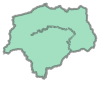

In [106]:
display(district_geometry)

## Visualisation avec folium

In [107]:
# On récupère le centre du polygone district
district_centroide = district_geometry.centroid

In [108]:
print(district_centroide)

POINT (12.084625074625666 5.558017685238768)


In [109]:
#Latitude avant la longitude
district_location = [district_centroide.y, district_centroide.x]

In [110]:
district_location

[5.558017685238768, 12.084625074625666]

##### L'argument location de la fonction folium.map doit être de coordonnées géographique WGS 84

In [111]:
type(district_location)

list

In [112]:
import folium
district_map = folium.Map(location=district_location, zoom_start=15)

In [113]:
display(district_map)

In [114]:
district_map = folium.Map(location=district_location, zoom_start=9)
folium.GeoJson(district_utm_32632.geometry).add_to(district_map)
folium.GeoJson(fosas_utm_32632.geometry).add_to(district_map)
display(district_map)

In [115]:
djole_center = djole_health_area.geometry.centroid

C:\Users\hp\AppData\Local\Temp\ipykernel_16320\136739247.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  djole_center = djole_health_area.geometry.centroid


In [116]:
djole_center

0    POINT (11.83688 4.84787)
dtype: geometry

In [117]:
djole_location = [djole_center.y, djole_center.x]

In [118]:
djole_location

[0    4.847866
 dtype: float64,
 0    11.836876
 dtype: float64]

In [119]:
pois_in_djole.head()

Type de poi        autre type de poi  \
25            Lieu de culte                      nan   
26  Gare routière et Agence  Gare routière et Agence   
27                   Marché                      nan   
28             Source d'eau                      nan   
31             Source d'eau                      nan   

                   Nom du poi         Quartier  Latitude  Longitude  \
25  Mission du plein évangile        Minfoumbe  4.843833  11.800301   
26    Gare routière Minfoumbe        Minfoumbe  4.845788  11.801163   
27           Marché minfoumbe        Minfoumbe  4.845411  11.801219   
28                     MEBAM   Issandja centre  4.765801  11.770559   
31              Forage Ndjolé      Ndjolé nord  4.813052  11.940201   

      Altitude                  geometry  index_right  OBJECTID_1  Id  Nom_AS  \
25  653.067566  POINT (11.80030 4.84383)            0        1666   0  Ndjole   
26  654.707825  POINT (11.80116 4.84579)            0        1666   0  Ndjole   
27  659.604919  POINT (11.80122 4.84541)            0        1666   0  Ndjole   
28  665.143000  POINT (11.77056 4.76580)            0        1666   0  Ndjole   
31  660.117493  POINT (11.94020 4.81305)            0        1666   0  Ndjole   

   Nom_Dist Source1     Source2  Code_AS Source3  Region         Area  
25     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
26     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
27     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
28     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
31     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743

In [120]:
djole_map = folium.Map(location=djole_location, zoom_start=11)
folium.GeoJson(djole_health_area.geometry).add_to(djole_map)
folium.GeoJson(pois_in_djole.geometry).add_to(djole_map)
display(djole_map)

In [121]:
djole_map = folium.Map(location=djole_location, zoom_start=11)
folium.GeoJson(djole_health_area.geometry).add_to(djole_map)
#folium.GeoJson(pois_in_djole.geometry).add_to(djole_map)
# Create a location and marker with each iteration for the djole_map
for row in pois_in_djole.iterrows():
    row_values = row[1] 
    location = [row_values['Latitude'], row_values['Longitude']]
    popup =  str(row_values['Type de poi']) + ' ' + str(row_values['Nom du poi'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(djole_map)

# Display the map
display(djole_map)

In [122]:
#Folium avec image satelittaire et popup
folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
).add_to(djole_map)
display(djole_map)

### Analyse spatiale: les zones tampons

Créer une zone tampon de 5 km autour des formations sanitaires

In [123]:
fosas_utm_32632_buffered = fosas_utm_32632.copy()

In [124]:
fosas_utm_32632_buffered['geometry'] = fosas_utm_32632_buffered.apply(lambda row:row.geometry.buffer(5000),axis=1)

In [125]:
fosas_utm_32632_buffered.head()

REGION DISTRICT    HEALTH_ARE                        NAME PEV       Lat  \
0  Centre     Yoko  Ngambe Tikar     CASE DE SANTE MBIOKO II  No  5.612258   
1  Centre     Yoko  Ngambe Tikar     CABINET DE SOINS DENISE  No  5.796722   
2  Centre     Yoko  Ngambe Tikar  CSI PRIVE EEC NGAMBE TIKAR  No  5.788533   
3  Centre     Yoko  Ngambe Tikar             CSI BEING BEING  No  5.950427   
4  Centre     Yoko  Ngambe Tikar                     CSI GAH  No  5.774500   

         Lon             Altitude            Type Form  \
0  11.206133  710.799999999999950            Case  POI   
1  11.501995  749.600000000000020              CS  POI   
2  11.489917  738.399999999999980  Centre Medical  POI   
3  11.542838  747.299999999999950  Centre Medical  POI   
4  11.364153  716.000000000000000  Centre Medical  POI   

                                            geometry  
0  POLYGON ((749378.082 620803.302, 749354.006 62...  
1  POLYGON ((782082.069 641345.179, 782057.992 64...  
2  POLYGON ((780747.641 640433.220, 780723.564 63...  
3  POLYGON ((786530.818 658372.631, 786506.742 65...  
4  POLYGON ((766818.266 638821.116, 766794.190 63...

In [126]:
type(fosas_utm_32632_buffered)

geopandas.geodataframe.GeoDataFrame

Ce geodataframe tampon a sa variable "géometry" de type polygone

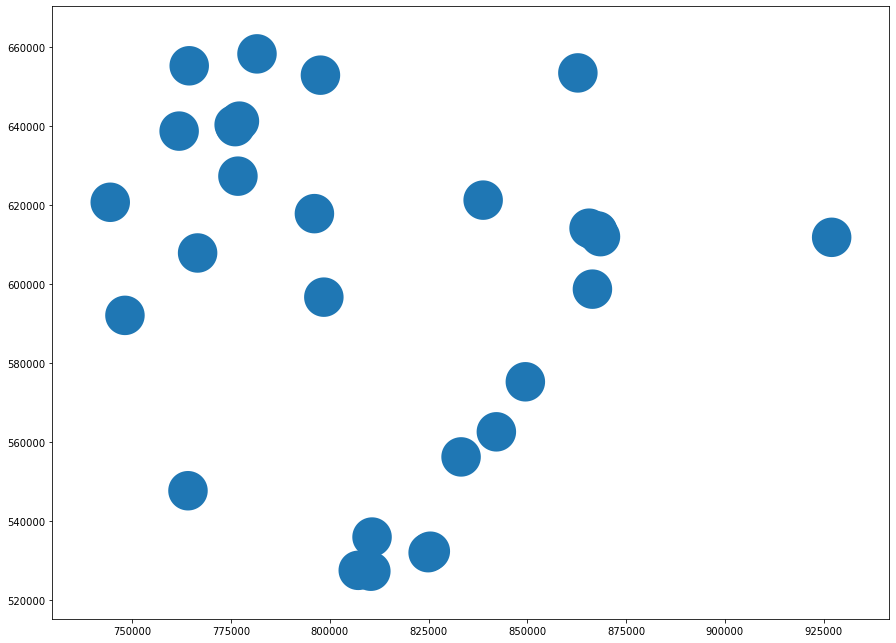

In [127]:
fosas_utm_32632_buffered.plot(figsize=(15,15))
plt.show()

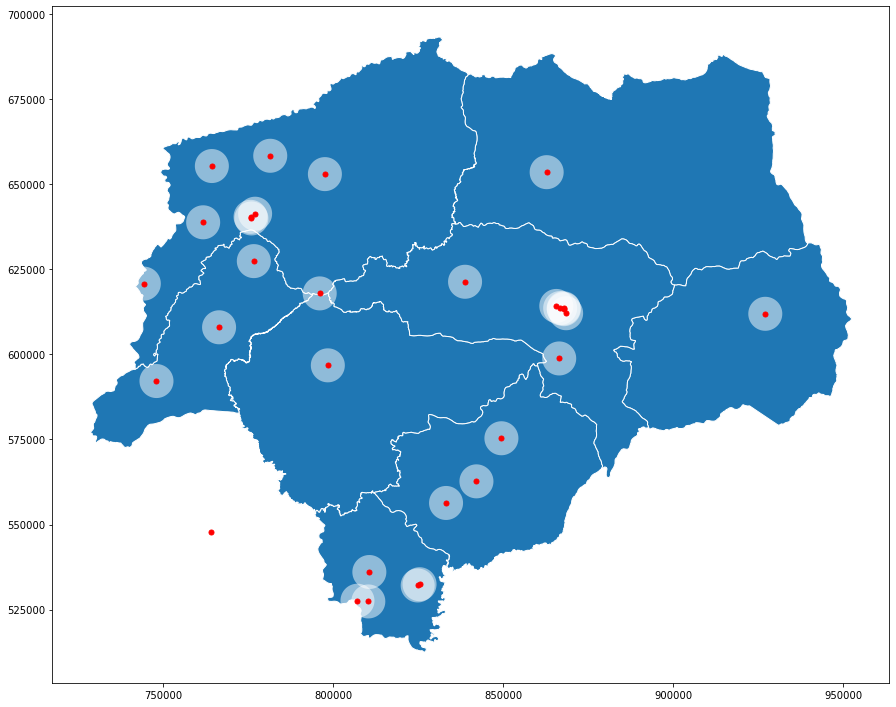

In [128]:
ax = district_utm_32632.plot(figsize=(15,15), edgecolor='white')
fosas_utm_32632_buffered.plot(ax=ax, alpha=0.5, color='white')
fosas_utm_32632.plot(ax=ax, markersize=25, color='red')

plt.show()

In [129]:
pois_quartier_djole_utm_32632 = pois_in_djole_utm_32632[pois_in_djole_utm_32632['Type de poi'] == 'Domicile de chef de quartier']

In [130]:
# POI de stratégie avancé
pois_SA_djole_utm_32632 = pois_in_djole_utm_32632[pois_in_djole_utm_32632['Type de poi'] == 'Site de stratégie avancée (vaccination, CPN recentrée...)']

In [131]:
pois_SA_djole_utm_32632_buffered = pois_SA_djole_utm_32632.copy()

In [132]:
pois_SA_djole_utm_32632_buffered['geometry'] = pois_SA_djole_utm_32632_buffered.apply(lambda row:row.geometry.buffer(5000),axis=1)

In [133]:
fosas_in_djole_utm_32632 = fosas_in_djole.to_crs(epsg=32632)

In [134]:
fosas_utm_32632_buffered.head()

REGION DISTRICT    HEALTH_ARE                        NAME PEV       Lat  \
0  Centre     Yoko  Ngambe Tikar     CASE DE SANTE MBIOKO II  No  5.612258   
1  Centre     Yoko  Ngambe Tikar     CABINET DE SOINS DENISE  No  5.796722   
2  Centre     Yoko  Ngambe Tikar  CSI PRIVE EEC NGAMBE TIKAR  No  5.788533   
3  Centre     Yoko  Ngambe Tikar             CSI BEING BEING  No  5.950427   
4  Centre     Yoko  Ngambe Tikar                     CSI GAH  No  5.774500   

         Lon             Altitude            Type Form  \
0  11.206133  710.799999999999950            Case  POI   
1  11.501995  749.600000000000020              CS  POI   
2  11.489917  738.399999999999980  Centre Medical  POI   
3  11.542838  747.299999999999950  Centre Medical  POI   
4  11.364153  716.000000000000000  Centre Medical  POI   

                                            geometry  
0  POLYGON ((749378.082 620803.302, 749354.006 62...  
1  POLYGON ((782082.069 641345.179, 782057.992 64...  
2  POLYGON ((780747.641 640433.220, 780723.564 63...  
3  POLYGON ((786530.818 658372.631, 786506.742 65...  
4  POLYGON ((766818.266 638821.116, 766794.190 63...

In [135]:
fosas_utm_32632_buffered_in_djole = fosas_utm_32632_buffered[fosas_utm_32632_buffered['HEALTH_ARE'] == 'Ndjole']

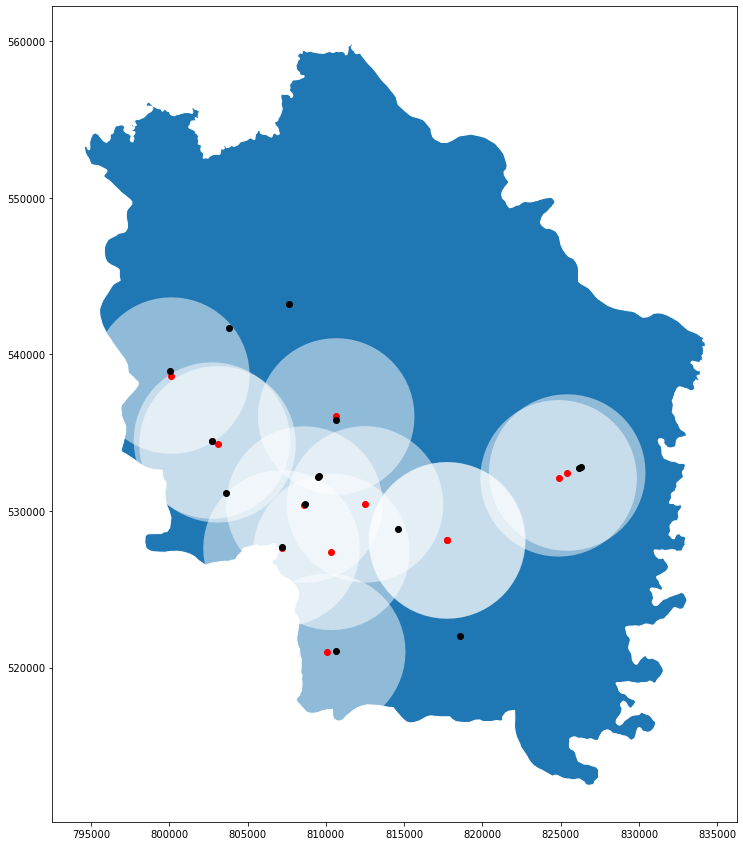

In [136]:
ax = djole_health_area_utm_32632.plot(figsize=(15,15), edgecolor='white')
fosas_utm_32632_buffered_in_djole.plot(ax=ax, alpha=0.5, color='white')
pois_SA_djole_utm_32632_buffered.plot(ax=ax, alpha=0.5, color='white')
fosas_in_djole_utm_32632.plot(ax=ax, color='red')
pois_SA_djole_utm_32632.plot(ax=ax, color="red")
pois_quartier_djole_utm_32632.plot(ax=ax, color="black")

plt.show()

Il ya deux quartiers qui sont à plus de 5 km

## Distance

In [137]:
pois_culte_djole_utm_32632 = pois_in_djole_utm_32632[pois_in_djole_utm_32632['Type de poi'] == 'Lieu de culte']

In [138]:
pois_culte_djole_utm_32632.head()

Type de poi autre type de poi  \
25  Lieu de culte               nan   
32  Lieu de culte               nan   
37  Lieu de culte               nan   
38  Lieu de culte               nan   
57  Lieu de culte               nan   

                                   Nom du poi         Quartier  Latitude  \
25                  Mission du plein évangile        Minfoumbe  4.843833   
32  Eglise évangelique  lutherienne de ndjolé      Ndjolé nord  4.812321   
37              Église universelle Ndjolé sud       Ndjolé sud  4.811283   
38                          Mosquée de Ndjolé      Ndjolé nord  4.812216   
57                  Eglise catholique romaine  Issandja centre  4.766965   

    Longitude    Altitude                       geometry  index_right  \
25  11.800301  653.067566  POINT (810620.690 536043.169)            0   
32  11.938325  662.364014  POINT (825958.933 532620.221)            0   
37  11.929711  658.252319  POINT (825003.048 532501.306)            0   
38  11.940127  662.003569  POINT (826159.074 532609.494)            0   
57  11.770666  655.387000  POINT (807365.400 527523.014)            0   

    OBJECTID_1  Id  Nom_AS Nom_Dist Source1     Source2  Code_AS Source3  \
25        1666   0  Ndjole     Yoko    None  LevÃ©s GPS  01YOO06    None   
32        1666   0  Ndjole     Yoko    None  LevÃ©s GPS  01YOO06    None   
37        1666   0  Ndjole     Yoko    None  LevÃ©s GPS  01YOO06    None   
38        1666   0  Ndjole     Yoko    None  LevÃ©s GPS  01YOO06    None   
57        1666   0  Ndjole     Yoko    None  LevÃ©s GPS  01YOO06    None   

    Region         Area  
25  Centre  1142.749743  
32  Centre  1142.749743  
37  Centre  1142.749743  
38  Centre  1142.749743  
57  Centre  1142.749743

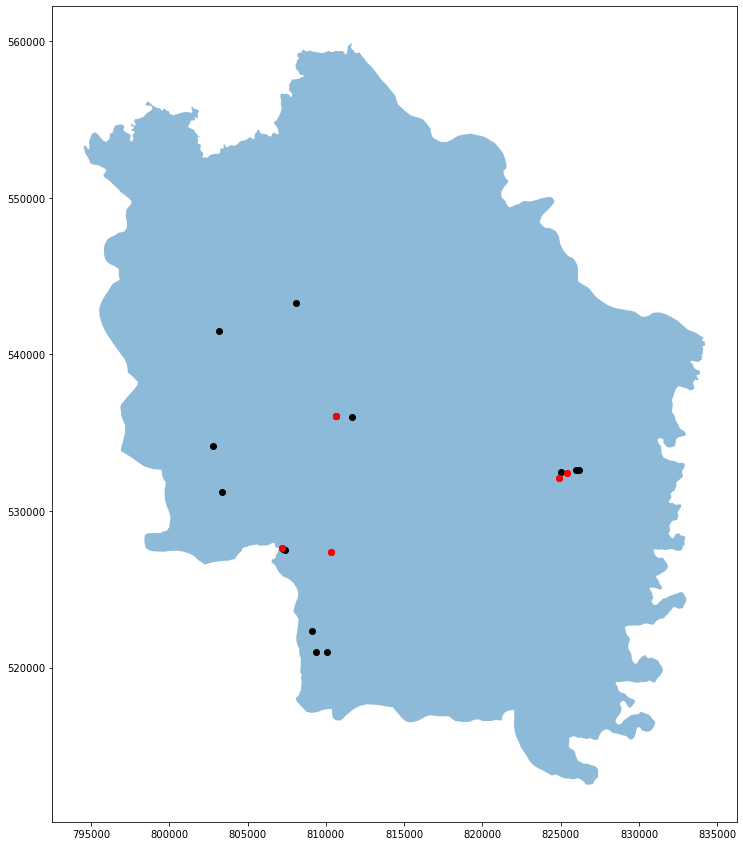

In [139]:
ax = djole_health_area_utm_32632.plot(figsize=(15,15), alpha=0.5)
fosas_in_djole_utm_32632.plot(ax=ax, color='red')
pois_culte_djole_utm_32632.plot(ax=ax, color="black")
fosas_in_djole_utm_32632.plot(ax=ax, color='red')

plt.show()

In [140]:
fosas_in_djole_utm_32632.geometry

12    POINT (810353.429 527399.298)
13    POINT (810658.857 536043.824)
20    POINT (824860.880 532091.116)
22    POINT (825411.900 532460.618)
23    POINT (807167.250 527618.720)
Name: geometry, dtype: geometry

In [141]:
CSI_Minfoumbe = fosas_in_djole_utm_32632.loc[13, 'geometry']

In [142]:
print(CSI_Minfoumbe)

POINT (810658.8572248712 536043.8235710819)


In [143]:
distance_to_minfoumbe = pois_culte_djole_utm_32632.distance(CSI_Minfoumbe)

In [144]:
distance_to_minfoumbe

25        38.173072
32     15678.436805
37     14775.156141
38     15876.124670
57      9135.154550
62      9150.868824
99      1000.034739
112     7723.356073
117     9269.001786
140     8722.794481
153    13774.313488
156    15072.592494
160    15045.400911
205     8116.987472
dtype: float64

In [145]:
#Distance du lieu de culte le plus éloigné du CSI de Minfoumbe
distance_max = distance_to_minfoumbe.max()

In [146]:
#Filtrer les lieux de culte à moins de 10 km du CSI
lieu_de_culte_le_plus_eloigné = pois_culte_djole_utm_32632[distance_to_minfoumbe == distance_max]

In [147]:
lieu_de_culte_le_plus_eloigné

Type de poi autre type de poi         Nom du poi     Quartier  Latitude  \
38  Lieu de culte               nan  Mosquée de Ndjolé  Ndjolé nord  4.812216   

    Longitude    Altitude                       geometry  index_right  \
38  11.940127  662.003569  POINT (826159.074 532609.494)            0   

    OBJECTID_1  Id  Nom_AS Nom_Dist Source1     Source2  Code_AS Source3  \
38        1666   0  Ndjole     Yoko    None  LevÃ©s GPS  01YOO06    None   

    Region         Area  
38  Centre  1142.749743

In [148]:
lieu_de_culte_le_plus_eloigné = pois_culte_djole_utm_32632.loc[38, 'geometry']

In [149]:
print(lieu_de_culte_le_plus_eloigné)

POINT (826159.0738669313 532609.4941463514)


In [150]:
culte_under_10_km = pois_culte_djole_utm_32632[distance_to_minfoumbe < 10000]

In [151]:
culte_under_10_km

Type de poi autre type de poi                       Nom du poi  \
25   Lieu de culte               nan        Mission du plein évangile   
57   Lieu de culte               nan        Eglise catholique romaine   
62   Lieu de culte               nan      Mission  du plein évangiles   
99   Lieu de culte               nan                Eglise catholique   
112  Lieu de culte               nan              Eglise pentecotiste   
117  Lieu de culte               nan  Eglise catholique oeuchimenique   
140  Lieu de culte               nan        Eglise catholique romaine   
205  Lieu de culte               nan                       La samarie   

               Quartier  Latitude  Longitude    Altitude  \
25            Minfoumbe  4.843833  11.800301  653.067566   
57      Issandja centre  4.766965  11.770666  655.387000   
62      Issandja centre  4.767290  11.769474  679.613000   
99           Minfoumbe   4.843630  11.809651  675.790771   
112  Vilage de la  paix  4.909669  11.777554  695.047363   
117              Galile  4.893356  11.733302  667.858643   
140       Ondada centre  4.800592  11.734953  665.198490   
205       Mewo'o centre  4.827077  11.729461  618.518223   

                          geometry  index_right  OBJECTID_1  Id  Nom_AS  \
25   POINT (810620.690 536043.169)            0        1666   0  Ndjole   
57   POINT (807365.400 527523.014)            0        1666   0  Ndjole   
62   POINT (807232.890 527558.474)            0        1666   0  Ndjole   
99   POINT (811658.716 536025.065)            0        1666   0  Ndjole   
112  POINT (808065.417 543318.732)            0        1666   0  Ndjole   
117  POINT (803160.957 541493.217)            0        1666   0  Ndjole   
140  POINT (803385.713 531228.377)            0        1666   0  Ndjole   
205  POINT (802764.240 534156.893)            0        1666   0  Ndjole   

    Nom_Dist Source1     Source2  Code_AS Source3  Region         Area  
25      Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
57      Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
62      Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
99      Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
112     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
117     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
140     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
205     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743

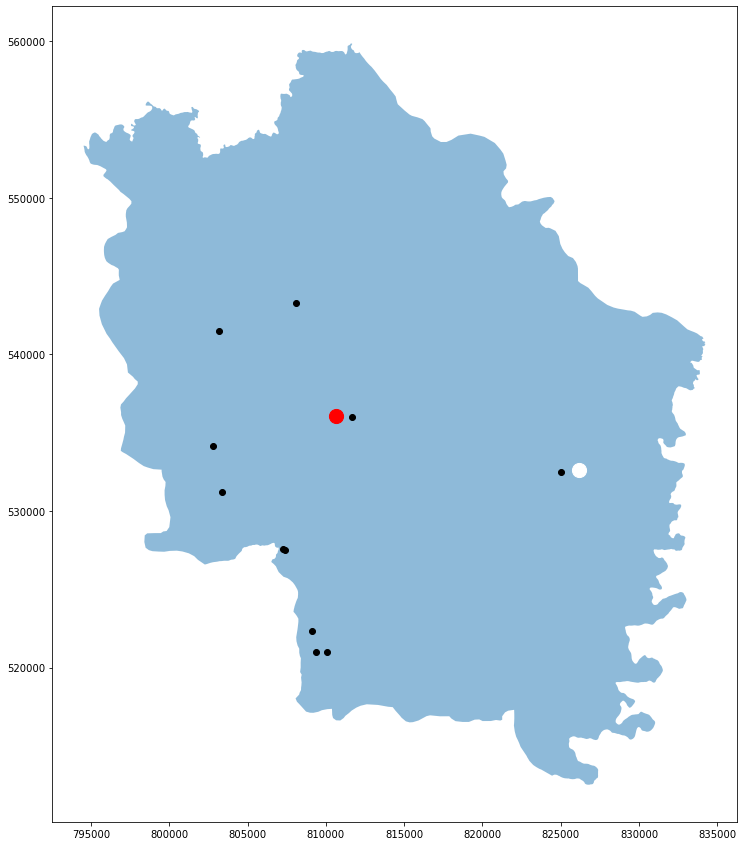

In [152]:
ax = djole_health_area_utm_32632.plot(figsize=(15,15), alpha=0.5)
#fosas_in_djole_utm_32632.plot(ax=ax, color='red')
pois_culte_djole_utm_32632.plot(ax=ax, color="black")
gpd.GeoSeries([CSI_Minfoumbe]).plot(ax=ax, color='red', markersize=200)
gpd.GeoSeries([lieu_de_culte_le_plus_eloigné]).plot(ax=ax, color='white', markersize=200)

plt.show()

## Superficie

In [153]:
district_utm_32632.geometry.area

0    4.783623e+09
1    3.277116e+09
2    2.608273e+09
3    2.313289e+09
4    1.666343e+09
5    1.142068e+09
6    4.536774e+09
7    3.108962e+09
dtype: float64

In [154]:
district_utm_32632.geometry.area.sum()/1e6

23436.448328891158

In [155]:
#Pourcentage de la superficie du cameroun
round(((district_utm_32632.geometry.area.sum()/1e6)/475000)*100,2)

4.93

Le district représente 4,93 % de la superficie du cameroun